# Data Preprocessing

## Import data and libraries

In [1]:
import re
import unicodedata as ud
import ast

import string

import numpy as np
from numpy import savetxt
from numpy import loadtxt
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import scipy.sparse

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD

from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn import model_selection
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
import visualkeras
from keras.utils import pad_sequences
from tensorflow.python.keras import layers
from keras.models import Model,Sequential, load_model
from keras.layers import Embedding,Dense,LSTM,Dropout,GlobalAveragePooling1D,Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.utils.vis_utils import plot_model

# Performance metrics
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity


from termcolor import colored

2023-09-14 06:00:52.846897: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_excel(r"/Users/macos/Desktop/Nhat?/Study cl (/News classification/code/data_new.xlsx")
data

Unnamed: 0                                              title  \
0               0  Album dang dở của nhạc sĩ 'Về đây nghe em' đượ...   
1               1              Mỹ Linh ôn chuyện tình với Bằng Kiều    
2               2  Á quân Giọng hát Việt nhí thi tuyển vào nhóm n...   
3               3               MV mới của Jungkook (BTS) gây chú ý    
4               4            Vỡ mộng kiếm lời khi 'ôm' vé Blackpink    
...           ...                                                ...   
41271       65421  Rủi ro tiềm ẩn sau hai năm bùng nổ trái phiếu ...   
41272       65422  CĐV Trung Quốc lo ngại sự tiến bộ của U23 Việt...   
41273       65423                        Nghi can sát hại cha bị bắt   
41274       65424            Ông Tất Thành Cang được đề nghị giảm án   
41275       65425              HLV Malaysia dọa ngáng đường Việt Nam   

                                                    text    category  
0      ['Đĩa nhạc ', ' - tuyển tập các ca khúc ', ' p...     âm nhạc  
1      ['Giao lưu với khán giả trong chương trình ', ...     âm nhạc  
2      ['Sáng 15/7, Linh Đan nói vui khi nhận thông b...     âm nhạc  
3      ['Teaser MV "Seven". Video: ', 'Tối 13/7, công...     âm nhạc  
4      ['Sự kiện Blackpink ', ' ở Hà Nội vào ngày 29 ...     âm nhạc  
...                                                  ...         ...  
41271  Ngày mai, Bộ trưởng Tài chính Hồ Đức Phớc và T...  kinh doanh  
41272  Hôm qua, trên Talk Sports xuất hiện bài viết "...    thể thao  
41273  Chiều 7/6, Khoa bị Công an quận Phú Nhuận phối...   pháp luật  
41274  Ngày 7/6, phiên xử phúc thẩm ông Tất Thành Can...   pháp luật  
41275  *Việt Nam - Malaysia: 20h thứ Tư 8/6, trên VnE...    thể thao  

[41276 rows x 4 columns]

In [3]:
data['category'].unique()

array(['âm nhạc', 'văn hoá', 'du lịch', 'công nghệ', 'sức khỏe',
       'ẩm thực', 'giáo dục', 'văn nghệ', 'đời sống', 'môi trường',
       'giải trí', 'kinh doanh', 'pháp luật', 'thể thao'], dtype=object)

In [4]:
data.columns

Index(['Unnamed: 0', 'title', 'text', 'category'], dtype='object')

In [5]:
data.drop(columns= "Unnamed: 0", inplace= True)
data.reset_index(inplace=True)
data.drop(columns= "index", inplace=True)
data

title  \
0      Album dang dở của nhạc sĩ 'Về đây nghe em' đượ...   
1                  Mỹ Linh ôn chuyện tình với Bằng Kiều    
2      Á quân Giọng hát Việt nhí thi tuyển vào nhóm n...   
3                   MV mới của Jungkook (BTS) gây chú ý    
4                Vỡ mộng kiếm lời khi 'ôm' vé Blackpink    
...                                                  ...   
41271  Rủi ro tiềm ẩn sau hai năm bùng nổ trái phiếu ...   
41272  CĐV Trung Quốc lo ngại sự tiến bộ của U23 Việt...   
41273                        Nghi can sát hại cha bị bắt   
41274            Ông Tất Thành Cang được đề nghị giảm án   
41275              HLV Malaysia dọa ngáng đường Việt Nam   

                                                    text    category  
0      ['Đĩa nhạc ', ' - tuyển tập các ca khúc ', ' p...     âm nhạc  
1      ['Giao lưu với khán giả trong chương trình ', ...     âm nhạc  
2      ['Sáng 15/7, Linh Đan nói vui khi nhận thông b...     âm nhạc  
3      ['Teaser MV "Seven". Video: ', 'Tối 13/7, công...     âm nhạc  
4      ['Sự kiện Blackpink ', ' ở Hà Nội vào ngày 29 ...     âm nhạc  
...                                                  ...         ...  
41271  Ngày mai, Bộ trưởng Tài chính Hồ Đức Phớc và T...  kinh doanh  
41272  Hôm qua, trên Talk Sports xuất hiện bài viết "...    thể thao  
41273  Chiều 7/6, Khoa bị Công an quận Phú Nhuận phối...   pháp luật  
41274  Ngày 7/6, phiên xử phúc thẩm ông Tất Thành Can...   pháp luật  
41275  *Việt Nam - Malaysia: 20h thứ Tư 8/6, trên VnE...    thể thao  

[41276 rows x 3 columns]

In [6]:
data.tail()

title  \
41271  Rủi ro tiềm ẩn sau hai năm bùng nổ trái phiếu ...   
41272  CĐV Trung Quốc lo ngại sự tiến bộ của U23 Việt...   
41273                        Nghi can sát hại cha bị bắt   
41274            Ông Tất Thành Cang được đề nghị giảm án   
41275              HLV Malaysia dọa ngáng đường Việt Nam   

                                                    text    category  
41271  Ngày mai, Bộ trưởng Tài chính Hồ Đức Phớc và T...  kinh doanh  
41272  Hôm qua, trên Talk Sports xuất hiện bài viết "...    thể thao  
41273  Chiều 7/6, Khoa bị Công an quận Phú Nhuận phối...   pháp luật  
41274  Ngày 7/6, phiên xử phúc thẩm ông Tất Thành Can...   pháp luật  
41275  *Việt Nam - Malaysia: 20h thứ Tư 8/6, trên VnE...    thể thao

In [7]:
data.isnull().sum()

title          4
text        1855
category       0
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.shape

(39417, 3)

In [10]:
data.drop(data[data['category'] == 'môi trường'].index, inplace = True)
data.drop(data[data['category'] == 'ẩm thực'].index, inplace = True)
data.drop(data[data['category'] == 'văn nghệ'].index, inplace = True)
data.drop(data[data['category'] == 'sức khỏe'].index, inplace = True)

In [11]:
convert_dict = {'category': str,
                'title': str,
                'text': str
                }
data = data.astype(convert_dict)
print(data.dtypes)

title       object
text        object
category    object
dtype: object


<Axes: title={'center': 'Số lượng bài báo theo thể loại'}, xlabel='category', ylabel='count'>

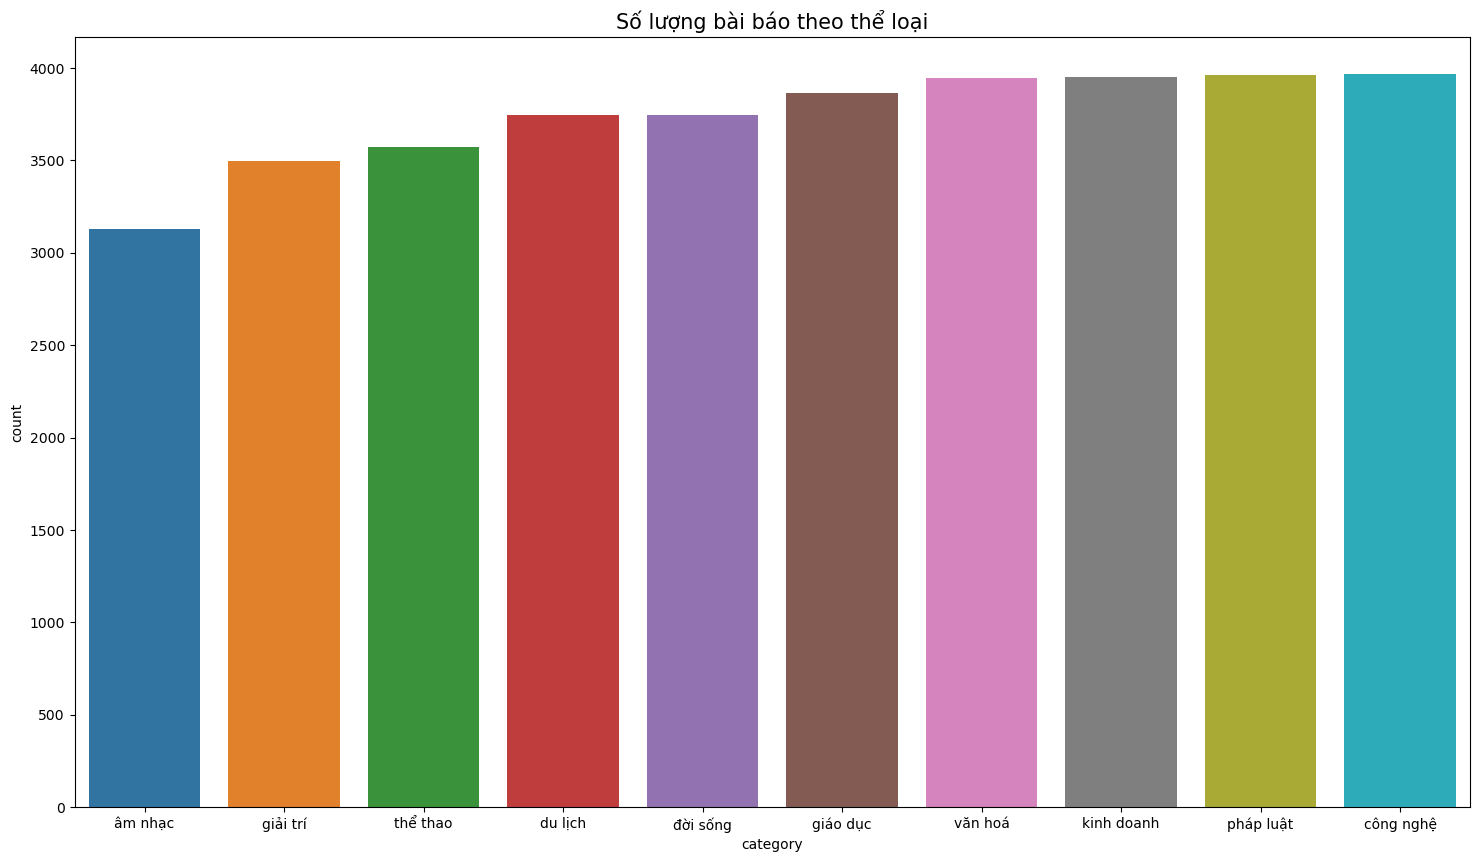

In [12]:
plt.figure(figsize= (18,10))
plt.title("Số lượng bài báo theo thể loại", fontdict={'fontsize': 15})
sns.countplot(data= data, x= "category", order = data['category'].value_counts(ascending=True).index)

In [13]:
data['category'].value_counts()

công nghệ     3968
pháp luật     3964
kinh doanh    3951
văn hoá       3944
giáo dục      3865
đời sống      3747
du lịch       3746
thể thao      3571
giải trí      3499
âm nhạc       3128
Name: category, dtype: int64

In [14]:
# Associate Category names with numerical index and save it in new column category_id
data['category_id'] = data['category'].factorize()[0]
# Create a new pandas dataframe "category_id_df", which only has unique Categories, also sorting this list in order of category_id values
category_id_df = data[['category', 'category_id']].drop_duplicates().sort_values('category_id')
# Create a dictionary ( python datastructure - like a lookup table) that
# can easily convert category names into category_ids and vice-versa
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)
id_to_category

{0: 'âm nhạc',
 1: 'văn hoá',
 2: 'du lịch',
 3: 'công nghệ',
 4: 'giáo dục',
 5: 'đời sống',
 6: 'giải trí',
 7: 'kinh doanh',
 8: 'pháp luật',
 9: 'thể thao'}

In [15]:
print(id_to_category.keys)

<built-in method keys of dict object at 0x7f843c584c80>


## Pre-processing data


### Text Normalization


In [16]:
def cleanWord(s):
    miss = ['!','@','#','$','%','^','&','*','(',')','-','–','_','+','=','{','[','}',']','|',':',';','?','/','<','>','~','`','‘','’',',','()','“','"', '...','”', '“”','\\', '>>', '>>>']
    for i in miss:
        s = s.replace(i,'')
    return re.sub(r'\'', '', s)

def remove_link(string):
    return re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', string)

def remove_extra_whitespace(string):
    text = re.sub(r'\s+', ' ', string).strip()
    return text

def lower_word(data):
    return data.lower()


# Remove puncuation from word
def rm_punc_from_word(word):
    clean_alphabet_list = [alphabet for alphabet in word if alphabet not in string.punctuation]
    return ''.join(clean_alphabet_list)

# Remove puncuation from text
def rm_punc_from_text(text):
    clean_word_list = [rm_punc_from_word(word) for word in text]
    return ''.join(clean_word_list)


# Cleaning text
def clean_text(text):
    text = text.lower()

    text = rm_punc_from_text(text)

    # there are hyphen(–) in many titles, so replacing it with empty str
    # this hyphen(–) is different from normal hyphen(-)
    text = re.sub('–', '', text)
    text = ' '.join(text.split())  # removing `extra` white spaces

    # Removing unnecessary characters from text
    text = re.sub("(\\t)", ' ', str(text)).lower()
    text = re.sub("(\\r)", ' ', str(text)).lower()
    text = re.sub("(\\n)", ' ', str(text)).lower()

    text = re.sub("(__+)", ' ', str(text)).lower()
    text = re.sub("(--+)", ' ', str(text)).lower()
    text = re.sub("(~~+)", ' ', str(text)).lower()
    text = re.sub("(\+\++)", ' ', str(text)).lower()
    text = re.sub("(\.\.+)", ' ', str(text)).lower()

    text = re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", ' ', str(text)).lower()

    text = re.sub("(mailto:)", ' ', str(text)).lower()
    text = re.sub(r"(\\x9\d)", ' ', str(text)).lower()
    text = re.sub("([iI][nN][cC]\d+)", 'INC_NUM', str(text)).lower()
    text = re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", 'CM_NUM',str(text)).lower()

    text = re.sub("(\.\s+)", ' ', str(text)).lower()
    text = re.sub("(\-\s+)", ' ', str(text)).lower()
    text = re.sub("(\:\s+)", ' ', str(text)).lower()
    text = re.sub("(\s+.\s+)", ' ', str(text)).lower()

    try:
        url = re.search(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', str(text))
        repl_url = url.group(3)
        text = re.sub(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', repl_url, str(text))
    except Exception as e:
        pass

    text = re.sub("(\s+)", ' ', str(text)).lower()
    text = re.sub("(\s+.\s+)", ' ', str(text)).lower()

    return text

def solve(string):
    func = [lower_word, remove_link, remove_extra_whitespace, cleanWord, clean_text]
    for i in func:
        string = i(string)
    return string

In [17]:
def syllablize(sentence):
    word = '\w+'
    non_word = '[^\w\s]'
    digits = '\d+([\.,_]\d+)+'

    patterns = []
    patterns.extend([word, non_word, digits])
    patterns = f"({'|'.join(patterns)})"

    sentence = ud.normalize('NFC', sentence)
    tokens = re.findall(patterns, sentence, re.UNICODE)
    return [token[0] for token in tokens]

In [18]:
text_cleaned = []
for text in data['text']:
    cleaned_text = clean_text(text)
    text_cleaned.append(cleaned_text)
text_cleaned

['đĩa nhạc tuyển tập các ca khúc phổ thơ thu tuyết ra mắt hôm 227 sau ba năm ấp tôi hạnh phúc khi di nguyện cuối đời của nhạc sĩ cũng được hoàn tất với tôi âm nhạc của ông luôn mang lại bình yên cho tâm hồn sau những ngày tháng chênh chao nhà thơ nói cố nhạc sĩ trần quang lộc 1949 2020 ảnh thu tuyết cho biết có duyên quen cố nhạc sĩ qua mạng xã hội từ tám năm trước chị vốn chưa từng gặp mặt chỉ biết đến ông là tác giả của nhiều ca khúc nổi tiếng như một ngày chị nhận được tin nhắn trên facebook của nhạc sĩ ông khen thơ chị có nhiều lạ ngỏ lời mời hợp tác để làm một album giữa hai người vốn ngưỡng mộ ông với các bài hát ca ngợi quê hương giàu chất trữ tình chị nhận lời ban đầu ông dự định phổ 10 bài thơ của thu tuyết để cùng thực hiện album đồng thời mời thu phương người hát thành công nhất nhạc của ông biểu diễn năm 2020 thể trạng ông sút trầm trọng vì ung thư phổi bà nguyễn thị thuận vợ cố nhạc sĩ cho biết mỗi khi thấy khỏe hơn đôi chút ông liền ngồi vào bàn làm việc vì quyết tâm hoàn

In [19]:
data['text_cleaned'] = text_cleaned
data

title  \
0      Album dang dở của nhạc sĩ 'Về đây nghe em' đượ...   
1                  Mỹ Linh ôn chuyện tình với Bằng Kiều    
2      Á quân Giọng hát Việt nhí thi tuyển vào nhóm n...   
3                   MV mới của Jungkook (BTS) gây chú ý    
4                Vỡ mộng kiếm lời khi 'ôm' vé Blackpink    
...                                                  ...   
41271  Rủi ro tiềm ẩn sau hai năm bùng nổ trái phiếu ...   
41272  CĐV Trung Quốc lo ngại sự tiến bộ của U23 Việt...   
41273                        Nghi can sát hại cha bị bắt   
41274            Ông Tất Thành Cang được đề nghị giảm án   
41275              HLV Malaysia dọa ngáng đường Việt Nam   

                                                    text    category  \
0      ['Đĩa nhạc ', ' - tuyển tập các ca khúc ', ' p...     âm nhạc   
1      ['Giao lưu với khán giả trong chương trình ', ...     âm nhạc   
2      ['Sáng 15/7, Linh Đan nói vui khi nhận thông b...     âm nhạc   
3      ['Teaser MV "Seven". Video: ', 'Tối 13/7, công...     âm nhạc   
4      ['Sự kiện Blackpink ', ' ở Hà Nội vào ngày 29 ...     âm nhạc   
...                                                  ...         ...   
41271  Ngày mai, Bộ trưởng Tài chính Hồ Đức Phớc và T...  kinh doanh   
41272  Hôm qua, trên Talk Sports xuất hiện bài viết "...    thể thao   
41273  Chiều 7/6, Khoa bị Công an quận Phú Nhuận phối...   pháp luật   
41274  Ngày 7/6, phiên xử phúc thẩm ông Tất Thành Can...   pháp luật   
41275  *Việt Nam - Malaysia: 20h thứ Tư 8/6, trên VnE...    thể thao   

       category_id                                       text_cleaned  
0                0  đĩa nhạc tuyển tập các ca khúc phổ thơ thu tuy...  
1                0  giao lưu với khán giả trong chương trình tối 1...  
2                0  sáng 157 linh đan nói vui khi nhận thông báo t...  
3                0  teaser mv seven video tối 137 công ty quản lý ...  
4                0  sự kiện blackpink hà nội vào ngày 29 và 307 đư...  
...            ...                                                ...  
41271            7  ngày mai bộ trưởng tài chính hồ đức phớc và th...  
41272            9  hôm qua trên talk sports xuất hiện bài viết vi...  
41273            8  chiều 76 khoa bị công an quận phú nhuận phối h...  
41274            8  ngày 76 phiên xử phúc thẩm ông tất thành cang ...  
41275            9  việt nam malaysia 20h thứ tư 86 trên vnexpress...  

[37383 rows x 5 columns]

### Remove Stopwords

In [20]:
def get_stopwords_list(stop_file_path):
    """load stop words """

    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return list(frozenset(stop_set))

stopwords_path = "vietnamese stopwords.txt"
stopwords = (get_stopwords_list(stopwords_path))
stopwords[0:10]

['khi nên',
 'ít nhất',
 'điều kiện',
 'đều nhau',
 'lấy thêm',
 'biết chừng nào',
 'ai',
 'mỗi ngày',
 'ra chơi',
 'lên đến']

In [21]:
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stopwords]
    return ' '.join(no_stopword_text)

data['text_cleaned'] = data['text_cleaned'].apply(lambda x: remove_stopwords(x))

### Text tokenize

#### Longest matching

In [22]:
def load_n_grams(path):
    with open(path, encoding='utf8') as f:
        words = f.read()
        words = ast.literal_eval(words)
    return words

In [23]:
def longest_matching(sentence):
    """
    sentence: sentence in the text that needs to be tokenized
    bi_grams: list of 2 grams words
    tri_grams: list of 3 grams words
    """

    bi_grams = load_n_grams('bi_grams.txt')
    tri_grams = load_n_grams('tri_grams.txt')

    syllables = syllablize(sentence)
    syl_len = len(syllables)

    curr_id = 0
    word_list = []
    done = False

    while (curr_id < syl_len) and (not done):
        curr_word = syllables[curr_id]
        if curr_id >= syl_len - 1:
            word_list.append(curr_word)
            done = True
        else:
            next_word = syllables[curr_id + 1]
            pair_word = ' '.join([curr_word.lower(), next_word.lower()])
            if curr_id >= (syl_len - 2):
                if pair_word in bi_grams:
                    word_list.append(' '.join([curr_word, next_word]))
                    curr_id += 2
                else:
                    word_list.append(curr_word)
                    curr_id += 1
            else:
                next_next_word = syllables[curr_id + 2]
                triple_word = ' '.join([pair_word, next_next_word.lower()])
                if triple_word in tri_grams:
                    word_list.append(' '.join([curr_word, next_word, next_next_word]))
                    curr_id += 3
                elif pair_word in bi_grams:
                    word_list.append(' '.join([curr_word, next_word]))
                    curr_id += 2
                else:
                    word_list.append(curr_word)
                    curr_id += 1
    return word_list

In [24]:

longest_matching('nhưng sự thực hiện vẫn còn chưa phù hợp')

['nhưng', 'sự thực', 'hiện', 'vẫn', 'còn', 'chưa', 'phù hợp']

In [25]:
text_tokenized_LM = []
for text in data["text_cleaned"]:
    tokenized_text = longest_matching(text)
    text_tokenized_LM.append(tokenized_text)
text_tokenized_LM[0]

['đĩa',
 'nhạc',
 'tuyển tập',
 'ca khúc',
 'phổ',
 'thơ',
 'thu',
 'tuyết',
 'mắt',
 'hôm',
 '227',
 'ấp',
 'hạnh phúc',
 'di',
 'nguyện',
 'đời',
 'nhạc sĩ',
 'hoàn tất',
 'âm nhạc',
 'bình yên',
 'tâm hồn',
 'chênh',
 'chao',
 'thơ',
 'cố',
 'nhạc sĩ',
 'trần',
 'quang',
 'lộc',
 '1949',
 '2020',
 'ảnh',
 'thu',
 'tuyết',
 'duyên',
 'quen',
 'cố',
 'nhạc sĩ',
 'mạng',
 'xã hội',
 'tám',
 'vốn',
 'mặt',
 'tác giả',
 'ca khúc',
 'nổi tiếng',
 'nhắn',
 'facebook',
 'nhạc sĩ',
 'khen',
 'thơ',
 'lạ',
 'ngỏ',
 'mời',
 'hợp tác',
 'album',
 'hai',
 'vốn',
 'ngưỡng mộ',
 'hát',
 'ca ngợi',
 'quê hương',
 'giàu',
 'chất',
 'trữ tình',
 'ban đầu',
 'dự định',
 'phổ',
 '10',
 'thơ',
 'thu',
 'tuyết',
 'thực hiện',
 'album',
 'đồng thời',
 'mời',
 'thu',
 'phương',
 'hát',
 'thành công',
 'nhạc',
 'biểu diễn',
 '2020',
 'thể trạng',
 'sút',
 'trầm trọng',
 'ung thư',
 'phổi',
 'nguyễn',
 'thị',
 'thuận',
 'vợ',
 'cố',
 'nhạc sĩ',
 'khỏe',
 'đôi chút',
 'liền',
 'bàn',
 'quyết tâm',
 'hoàn thàn

In [26]:
data['text_tokenized_LM'] = text_tokenized_LM
data

title  \
0      Album dang dở của nhạc sĩ 'Về đây nghe em' đượ...   
1                  Mỹ Linh ôn chuyện tình với Bằng Kiều    
2      Á quân Giọng hát Việt nhí thi tuyển vào nhóm n...   
3                   MV mới của Jungkook (BTS) gây chú ý    
4                Vỡ mộng kiếm lời khi 'ôm' vé Blackpink    
...                                                  ...   
41271  Rủi ro tiềm ẩn sau hai năm bùng nổ trái phiếu ...   
41272  CĐV Trung Quốc lo ngại sự tiến bộ của U23 Việt...   
41273                        Nghi can sát hại cha bị bắt   
41274            Ông Tất Thành Cang được đề nghị giảm án   
41275              HLV Malaysia dọa ngáng đường Việt Nam   

                                                    text    category  \
0      ['Đĩa nhạc ', ' - tuyển tập các ca khúc ', ' p...     âm nhạc   
1      ['Giao lưu với khán giả trong chương trình ', ...     âm nhạc   
2      ['Sáng 15/7, Linh Đan nói vui khi nhận thông b...     âm nhạc   
3      ['Teaser MV "Seven". Video: ', 'Tối 13/7, công...     âm nhạc   
4      ['Sự kiện Blackpink ', ' ở Hà Nội vào ngày 29 ...     âm nhạc   
...                                                  ...         ...   
41271  Ngày mai, Bộ trưởng Tài chính Hồ Đức Phớc và T...  kinh doanh   
41272  Hôm qua, trên Talk Sports xuất hiện bài viết "...    thể thao   
41273  Chiều 7/6, Khoa bị Công an quận Phú Nhuận phối...   pháp luật   
41274  Ngày 7/6, phiên xử phúc thẩm ông Tất Thành Can...   pháp luật   
41275  *Việt Nam - Malaysia: 20h thứ Tư 8/6, trên VnE...    thể thao   

       category_id                                       text_cleaned  \
0                0  đĩa nhạc tuyển tập ca khúc phổ thơ thu tuyết m...   
1                0  giao lưu khán giả chương trình tối 157 ca sĩ đ...   
2                0  157 linh đan vui thông báo sản xuất đón đọc th...   
3                0  teaser mv seven video tối 137 công ty quản lý ...   
4                0  kiện blackpink hà nội 29 307 cộng đồng yêu kpo...   
...            ...                                                ...   
41271            7  mai trưởng tài hồ đức phớc thống đốc ngân hàng...   
41272            9  hôm talk sports xuất hiện viết việt nam tỏa u2...   
41273            8  chiều 76 khoa công an phú nhuận phối hợp công ...   
41274            8  76 phiên xử phúc thẩm tất thành cang 50 tề trí...   
41275            9  việt nam malaysia 20h tư 86 vnexpress malaysia...   

                                       text_tokenized_LM  
0      [đĩa, nhạc, tuyển tập, ca khúc, phổ, thơ, thu,...  
1      [giao lưu, khán giả, chương trình, tối, 157, c...  
2      [157, linh đan, vui, thông báo, sản xuất, đón,...  
3      [teaser, mv, seven, video, tối, 137, công ty, ...  
4      [kiện, blackpink, hà, nội, 29, 307, cộng đồng,...  
...                                                  ...  
41271  [mai, trưởng, tài, hồ, đức, phớc, thống đốc, n...  
41272  [hôm, talk, sports, xuất hiện, viết, việt, nam...  
41273  [chiều, 76, khoa, công an, phú, nhuận, phối hợ...  
41274  [76, phiên, xử, phúc thẩm, tất, thành, cang, 5...  
41275  [việt, nam, malaysia, 20h, tư, 86, vnexpress, ...  

[37383 rows x 6 columns]

#### 1 gram tokenize

In [27]:
text_tokenized_space = []
for text in data["text_cleaned"]:
    tokenized_text_space = text.split(" ")
    text_tokenized_space.append(tokenized_text_space)

In [28]:
print (text_tokenized_space[0])

['đĩa', 'nhạc', 'tuyển', 'tập', 'ca', 'khúc', 'phổ', 'thơ', 'thu', 'tuyết', 'mắt', 'hôm', '227', 'ấp', 'hạnh', 'phúc', 'di', 'nguyện', 'đời', 'nhạc', 'sĩ', 'hoàn', 'tất', 'âm', 'nhạc', 'bình', 'yên', 'tâm', 'hồn', 'chênh', 'chao', 'thơ', 'cố', 'nhạc', 'sĩ', 'trần', 'quang', 'lộc', '1949', '2020', 'ảnh', 'thu', 'tuyết', 'duyên', 'quen', 'cố', 'nhạc', 'sĩ', 'mạng', 'xã', 'hội', 'tám', 'vốn', 'mặt', 'tác', 'giả', 'ca', 'khúc', 'nổi', 'tiếng', 'nhắn', 'facebook', 'nhạc', 'sĩ', 'khen', 'thơ', 'lạ', 'ngỏ', 'mời', 'hợp', 'tác', 'album', 'hai', 'vốn', 'ngưỡng', 'mộ', 'hát', 'ca', 'ngợi', 'quê', 'hương', 'giàu', 'chất', 'trữ', 'tình', 'ban', 'đầu', 'dự', 'định', 'phổ', '10', 'thơ', 'thu', 'tuyết', 'thực', 'hiện', 'album', 'đồng', 'thời', 'mời', 'thu', 'phương', 'hát', 'thành', 'công', 'nhạc', 'biểu', 'diễn', '2020', 'thể', 'trạng', 'sút', 'trầm', 'trọng', 'ung', 'thư', 'phổi', 'nguyễn', 'thị', 'thuận', 'vợ', 'cố', 'nhạc', 'sĩ', 'khỏe', 'đôi', 'chút', 'liền', 'bàn', 'quyết', 'tâm', 'hoàn', 'thàn

In [29]:
len(text_tokenized_space)

37383

In [30]:
data['text_tokenized_space'] = text_tokenized_space
data

title  \
0      Album dang dở của nhạc sĩ 'Về đây nghe em' đượ...   
1                  Mỹ Linh ôn chuyện tình với Bằng Kiều    
2      Á quân Giọng hát Việt nhí thi tuyển vào nhóm n...   
3                   MV mới của Jungkook (BTS) gây chú ý    
4                Vỡ mộng kiếm lời khi 'ôm' vé Blackpink    
...                                                  ...   
41271  Rủi ro tiềm ẩn sau hai năm bùng nổ trái phiếu ...   
41272  CĐV Trung Quốc lo ngại sự tiến bộ của U23 Việt...   
41273                        Nghi can sát hại cha bị bắt   
41274            Ông Tất Thành Cang được đề nghị giảm án   
41275              HLV Malaysia dọa ngáng đường Việt Nam   

                                                    text    category  \
0      ['Đĩa nhạc ', ' - tuyển tập các ca khúc ', ' p...     âm nhạc   
1      ['Giao lưu với khán giả trong chương trình ', ...     âm nhạc   
2      ['Sáng 15/7, Linh Đan nói vui khi nhận thông b...     âm nhạc   
3      ['Teaser MV "Seven". Video: ', 'Tối 13/7, công...     âm nhạc   
4      ['Sự kiện Blackpink ', ' ở Hà Nội vào ngày 29 ...     âm nhạc   
...                                                  ...         ...   
41271  Ngày mai, Bộ trưởng Tài chính Hồ Đức Phớc và T...  kinh doanh   
41272  Hôm qua, trên Talk Sports xuất hiện bài viết "...    thể thao   
41273  Chiều 7/6, Khoa bị Công an quận Phú Nhuận phối...   pháp luật   
41274  Ngày 7/6, phiên xử phúc thẩm ông Tất Thành Can...   pháp luật   
41275  *Việt Nam - Malaysia: 20h thứ Tư 8/6, trên VnE...    thể thao   

       category_id                                       text_cleaned  \
0                0  đĩa nhạc tuyển tập ca khúc phổ thơ thu tuyết m...   
1                0  giao lưu khán giả chương trình tối 157 ca sĩ đ...   
2                0  157 linh đan vui thông báo sản xuất đón đọc th...   
3                0  teaser mv seven video tối 137 công ty quản lý ...   
4                0  kiện blackpink hà nội 29 307 cộng đồng yêu kpo...   
...            ...                                                ...   
41271            7  mai trưởng tài hồ đức phớc thống đốc ngân hàng...   
41272            9  hôm talk sports xuất hiện viết việt nam tỏa u2...   
41273            8  chiều 76 khoa công an phú nhuận phối hợp công ...   
41274            8  76 phiên xử phúc thẩm tất thành cang 50 tề trí...   
41275            9  việt nam malaysia 20h tư 86 vnexpress malaysia...   

                                       text_tokenized_LM  \
0      [đĩa, nhạc, tuyển tập, ca khúc, phổ, thơ, thu,...   
1      [giao lưu, khán giả, chương trình, tối, 157, c...   
2      [157, linh đan, vui, thông báo, sản xuất, đón,...   
3      [teaser, mv, seven, video, tối, 137, công ty, ...   
4      [kiện, blackpink, hà, nội, 29, 307, cộng đồng,...   
...                                                  ...   
41271  [mai, trưởng, tài, hồ, đức, phớc, thống đốc, n...   
41272  [hôm, talk, sports, xuất hiện, viết, việt, nam...   
41273  [chiều, 76, khoa, công an, phú, nhuận, phối hợ...   
41274  [76, phiên, xử, phúc thẩm, tất, thành, cang, 5...   
41275  [việt, nam, malaysia, 20h, tư, 86, vnexpress, ...   

                                    text_tokenized_space  
0      [đĩa, nhạc, tuyển, tập, ca, khúc, phổ, thơ, th...  
1      [giao, lưu, khán, giả, chương, trình, tối, 157...  
2      [157, linh, đan, vui, thông, báo, sản, xuất, đ...  
3      [teaser, mv, seven, video, tối, 137, công, ty,...  
4      [kiện, blackpink, hà, nội, 29, 307, cộng, đồng...  
...                                                  ...  
41271  [mai, trưởng, tài, hồ, đức, phớc, thống, đốc, ...  
41272  [hôm, talk, sports, xuất, hiện, viết, việt, na...  
41273  [chiều, 76, khoa, công, an, phú, nhuận, phối, ...  
41274  [76, phiên, xử, phúc, thẩm, tất, thành, cang, ...  
41275  [việt, nam, malaysia, 20h, tư, 86, vnexpress, ...  

[37383 rows x 7 columns]

In [31]:
data.reset_index(inplace=True)
data.drop(columns= "index", inplace=True)

In [32]:
data

title  \
0      Album dang dở của nhạc sĩ 'Về đây nghe em' đượ...   
1                  Mỹ Linh ôn chuyện tình với Bằng Kiều    
2      Á quân Giọng hát Việt nhí thi tuyển vào nhóm n...   
3                   MV mới của Jungkook (BTS) gây chú ý    
4                Vỡ mộng kiếm lời khi 'ôm' vé Blackpink    
...                                                  ...   
37378  Rủi ro tiềm ẩn sau hai năm bùng nổ trái phiếu ...   
37379  CĐV Trung Quốc lo ngại sự tiến bộ của U23 Việt...   
37380                        Nghi can sát hại cha bị bắt   
37381            Ông Tất Thành Cang được đề nghị giảm án   
37382              HLV Malaysia dọa ngáng đường Việt Nam   

                                                    text    category  \
0      ['Đĩa nhạc ', ' - tuyển tập các ca khúc ', ' p...     âm nhạc   
1      ['Giao lưu với khán giả trong chương trình ', ...     âm nhạc   
2      ['Sáng 15/7, Linh Đan nói vui khi nhận thông b...     âm nhạc   
3      ['Teaser MV "Seven". Video: ', 'Tối 13/7, công...     âm nhạc   
4      ['Sự kiện Blackpink ', ' ở Hà Nội vào ngày 29 ...     âm nhạc   
...                                                  ...         ...   
37378  Ngày mai, Bộ trưởng Tài chính Hồ Đức Phớc và T...  kinh doanh   
37379  Hôm qua, trên Talk Sports xuất hiện bài viết "...    thể thao   
37380  Chiều 7/6, Khoa bị Công an quận Phú Nhuận phối...   pháp luật   
37381  Ngày 7/6, phiên xử phúc thẩm ông Tất Thành Can...   pháp luật   
37382  *Việt Nam - Malaysia: 20h thứ Tư 8/6, trên VnE...    thể thao   

       category_id                                       text_cleaned  \
0                0  đĩa nhạc tuyển tập ca khúc phổ thơ thu tuyết m...   
1                0  giao lưu khán giả chương trình tối 157 ca sĩ đ...   
2                0  157 linh đan vui thông báo sản xuất đón đọc th...   
3                0  teaser mv seven video tối 137 công ty quản lý ...   
4                0  kiện blackpink hà nội 29 307 cộng đồng yêu kpo...   
...            ...                                                ...   
37378            7  mai trưởng tài hồ đức phớc thống đốc ngân hàng...   
37379            9  hôm talk sports xuất hiện viết việt nam tỏa u2...   
37380            8  chiều 76 khoa công an phú nhuận phối hợp công ...   
37381            8  76 phiên xử phúc thẩm tất thành cang 50 tề trí...   
37382            9  việt nam malaysia 20h tư 86 vnexpress malaysia...   

                                       text_tokenized_LM  \
0      [đĩa, nhạc, tuyển tập, ca khúc, phổ, thơ, thu,...   
1      [giao lưu, khán giả, chương trình, tối, 157, c...   
2      [157, linh đan, vui, thông báo, sản xuất, đón,...   
3      [teaser, mv, seven, video, tối, 137, công ty, ...   
4      [kiện, blackpink, hà, nội, 29, 307, cộng đồng,...   
...                                                  ...   
37378  [mai, trưởng, tài, hồ, đức, phớc, thống đốc, n...   
37379  [hôm, talk, sports, xuất hiện, viết, việt, nam...   
37380  [chiều, 76, khoa, công an, phú, nhuận, phối hợ...   
37381  [76, phiên, xử, phúc thẩm, tất, thành, cang, 5...   
37382  [việt, nam, malaysia, 20h, tư, 86, vnexpress, ...   

                                    text_tokenized_space  
0      [đĩa, nhạc, tuyển, tập, ca, khúc, phổ, thơ, th...  
1      [giao, lưu, khán, giả, chương, trình, tối, 157...  
2      [157, linh, đan, vui, thông, báo, sản, xuất, đ...  
3      [teaser, mv, seven, video, tối, 137, công, ty,...  
4      [kiện, blackpink, hà, nội, 29, 307, cộng, đồng...  
...                                                  ...  
37378  [mai, trưởng, tài, hồ, đức, phớc, thống, đốc, ...  
37379  [hôm, talk, sports, xuất, hiện, viết, việt, na...  
37380  [chiều, 76, khoa, công, an, phú, nhuận, phối, ...  
37381  [76, phiên, xử, phúc, thẩm, tất, thành, cang, ...  
37382  [việt, nam, malaysia, 20h, tư, 86, vnexpress, ...  

[37383 rows x 7 columns]

In [33]:
print ((text_tokenized_LM[0]))
print (text_tokenized_space[0])
print (text_cleaned[0])

['đĩa', 'nhạc', 'tuyển tập', 'ca khúc', 'phổ', 'thơ', 'thu', 'tuyết', 'mắt', 'hôm', '227', 'ấp', 'hạnh phúc', 'di', 'nguyện', 'đời', 'nhạc sĩ', 'hoàn tất', 'âm nhạc', 'bình yên', 'tâm hồn', 'chênh', 'chao', 'thơ', 'cố', 'nhạc sĩ', 'trần', 'quang', 'lộc', '1949', '2020', 'ảnh', 'thu', 'tuyết', 'duyên', 'quen', 'cố', 'nhạc sĩ', 'mạng', 'xã hội', 'tám', 'vốn', 'mặt', 'tác giả', 'ca khúc', 'nổi tiếng', 'nhắn', 'facebook', 'nhạc sĩ', 'khen', 'thơ', 'lạ', 'ngỏ', 'mời', 'hợp tác', 'album', 'hai', 'vốn', 'ngưỡng mộ', 'hát', 'ca ngợi', 'quê hương', 'giàu', 'chất', 'trữ tình', 'ban đầu', 'dự định', 'phổ', '10', 'thơ', 'thu', 'tuyết', 'thực hiện', 'album', 'đồng thời', 'mời', 'thu', 'phương', 'hát', 'thành công', 'nhạc', 'biểu diễn', '2020', 'thể trạng', 'sút', 'trầm trọng', 'ung thư', 'phổi', 'nguyễn', 'thị', 'thuận', 'vợ', 'cố', 'nhạc sĩ', 'khỏe', 'đôi chút', 'liền', 'bàn', 'quyết tâm', 'hoàn thành', 'dự án', 'thời gian', 'đời', 'mắt', 'nhạc sĩ', 'nỗ lực', 'hoàn thiện', 'bốn', 'tổng cộng', 'tám

In [34]:
data.to_excel("data_processed.xlsx")

### Create vocabulary

#### 1 gram vocabulary

In [35]:
vocabulary_1gram = set()
for text in data["text_tokenized_space"]:
    for word in text:
        vocabulary_1gram.add(word)
print (f"The size of the vocab is: {len(vocabulary_1gram)}")
vocabulary_1gram

The size of the vocab is: 95167


{'',
 'tods',
 'beely',
 'httpstcdulichtphcmvnthethaovideokyrgiostsitsipas3setcangthangchienthangxungdangnguồn',
 'gyeongbokgung',
 'nnếu',
 'malibu',
 'cạn…với',
 '7h10',
 'celestina',
 '18000m2',
 'toát',
 '“man',
 'httpstcdulichtphcmvndukhaongoinhathomauhongmomangovinhlongc14a33793html',
 'dfeh',
 'makoto',
 'transerco',
 'cafeland',
 'rimula',
 'takeo',
 'jeanjacques',
 'duân',
 'sano',
 'kay',
 'khủa',
 '069',
 'starck',
 'hkai',
 'devlin',
 'vể',
 'rưỡi',
 'spartan',
 '13893',
 'sheree',
 '82018',
 'cẩu”',
 'heidelberg',
 'lovestory',
 'bổng”',
 'daejejeon',
 'oldboy',
 '“gói',
 'frameworkphương',
 'winner',
 'livescore',
 'greetham',
 'ielts…',
 '22547',
 'blackmores',
 'daichi',
 'website',
 'genshin',
 '“sự',
 'nétảnh',
 'tếtài',
 'trìnhngànhnhóm',
 'ưu',
 '90km',
 'stubbs',
 'zazzara',
 'empoli',
 'ladakh',
 'voi',
 'kampung',
 'seltzer',
 '1136185',
 '159000',
 '8808',
 'martinez',
 'casamia',
 '29c811xx',
 '635l',
 'abm',
 '2811',
 'fifa”',
 'klaus',
 'directtoconsumer',
 

#### LM vocabulary

In [36]:
vocabulary_LM = set()
for text in data["text_tokenized_LM"]:
    for word in text:
        vocabulary_LM.add(word)
print (f"The size of the vocab is: {len(vocabulary_LM)}")
vocabulary_LM

The size of the vocab is: 99362


{'tods',
 'beely',
 'căm phẫn',
 'httpstcdulichtphcmvnthethaovideokyrgiostsitsipas3setcangthangchienthangxungdangnguồn',
 'gyeongbokgung',
 'nnếu',
 'malibu',
 'lẩn trốn',
 'phân tách',
 'gõ đầu trẻ',
 '7h10',
 'băng vệ sinh',
 'celestina',
 '18000m2',
 'toát',
 'httpstcdulichtphcmvndukhaongoinhathomauhongmomangovinhlongc14a33793html',
 'dfeh',
 'makoto',
 'transerco',
 'cafeland',
 'rimula',
 'takeo',
 'jeanjacques',
 'duân',
 'sano',
 'rơm rạ',
 'kay',
 'thứ bậc',
 'khủa',
 '069',
 'chúc mừng',
 'starck',
 'hkai',
 'devlin',
 'vể',
 'spartan',
 '13893',
 'sheree',
 '82018',
 'đầu đề',
 'heidelberg',
 'lovestory',
 'daejejeon',
 'oldboy',
 'frameworkphương',
 'winner',
 'livescore',
 'thượng sách',
 'greetham',
 'ngoại lệ',
 '22547',
 'đường ống',
 'diễn tập',
 'blackmores',
 'baì',
 'daichi',
 'website',
 'genshin',
 'da lươn',
 'tươi vui',
 'nétảnh',
 'tếtài',
 'trìnhngànhnhóm',
 'ưu',
 '90km',
 'stubbs',
 'trừng trị',
 'hành giả',
 'empoli',
 'ladakh',
 'voi',
 'kampung',
 'seltzer

In [48]:
# Drop unecessary words
vocabulary_LM_lst = list(vocabulary_LM)

for word in vocabulary_LM_lst:
    if len(word) > 15:
        vocabulary_LM_lst.remove(word)
print (len(vocabulary_LM_lst))

95279


In [38]:
vocabulary_1gram_lst = list(vocabulary_1gram)

for word in vocabulary_1gram_lst:
    if len(word) > 15:
        vocabulary_1gram_lst.remove(word)
print (len(vocabulary_1gram_lst))

91096


### Train Test Split + Vectorize

In [42]:
def one_gram_tokenize(data):
    return [text.split(" ") for text in data]
def LM_tokenize (data):
    return [longest_matching(text) for text in data]

In [39]:
# Initial Count Vectorizer
def dummy(doc):
    return doc

# SVD for dimension reduction
def truncatedvectors(data,n_components):
  svd_ngram = TruncatedSVD(n_components=n_components, random_state=42)
  svd_ngram.fit_transform(data)
  return data

def CV(data, vocabulary):
  CV_vect = CountVectorizer(preprocessor=dummy, tokenizer=dummy, vocabulary=vocabulary)
  X_data_CV =  CV_vect.fit_transform(data)
  # return truncatedvectors(X_data_CV)
  return (X_data_CV)

def tfidf(data, vocabulary):
  tfidf_vect = TfidfVectorizer(preprocessor=dummy, tokenizer=dummy, vocabulary=vocabulary, ngram_range=(1, 4))
  X_data_tfidf =  tfidf_vect.fit_transform(data)
  # return truncatedvectors(X_data_tfidf)
  return (X_data_tfidf)

In [40]:
X = data.loc[:, "text_cleaned"]
y = data.loc[:,'category_id']
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, data.index, test_size=0.2, random_state=55)
print (X_train.shape)
print (y_train.shape)

(29906,)
(29906,)


In [41]:
y_train_df = pd.DataFrame(y_train.values, columns=['category_ids'])
y_test_df = pd.DataFrame(y_test.values, columns=['category_ids'])

In [97]:
category_train = []
category_test = []

for category_id in y_train_df['category_ids']:
    for key, val in id_to_category.items():
        if category_id == key:
            category_train.append(val)
for category_id in y_test_df['category_ids']:
    for key, val in id_to_category.items():
        if category_id == key:
            category_test.append(val)
y_train_df['category'] = category_train
y_test_df['category'] = category_test

In [98]:
y_train_df['category'].value_counts()

kinh doanh    3211
pháp luật     3174
văn hoá       3164
công nghệ     3142
giáo dục      3070
đời sống      3002
du lịch       2975
thể thao      2871
giải trí      2781
âm nhạc       2516
Name: category, dtype: int64

In [99]:
y_test_df['category'].value_counts()

công nghệ     826
giáo dục      795
pháp luật     790
văn hoá       780
du lịch       771
đời sống      745
kinh doanh    740
giải trí      718
thể thao      700
âm nhạc       612
Name: category, dtype: int64

<Axes: title={'center': 'Số lượng bài báo trong tập dữ liệu huấn luyện'}, xlabel='category', ylabel='count'>

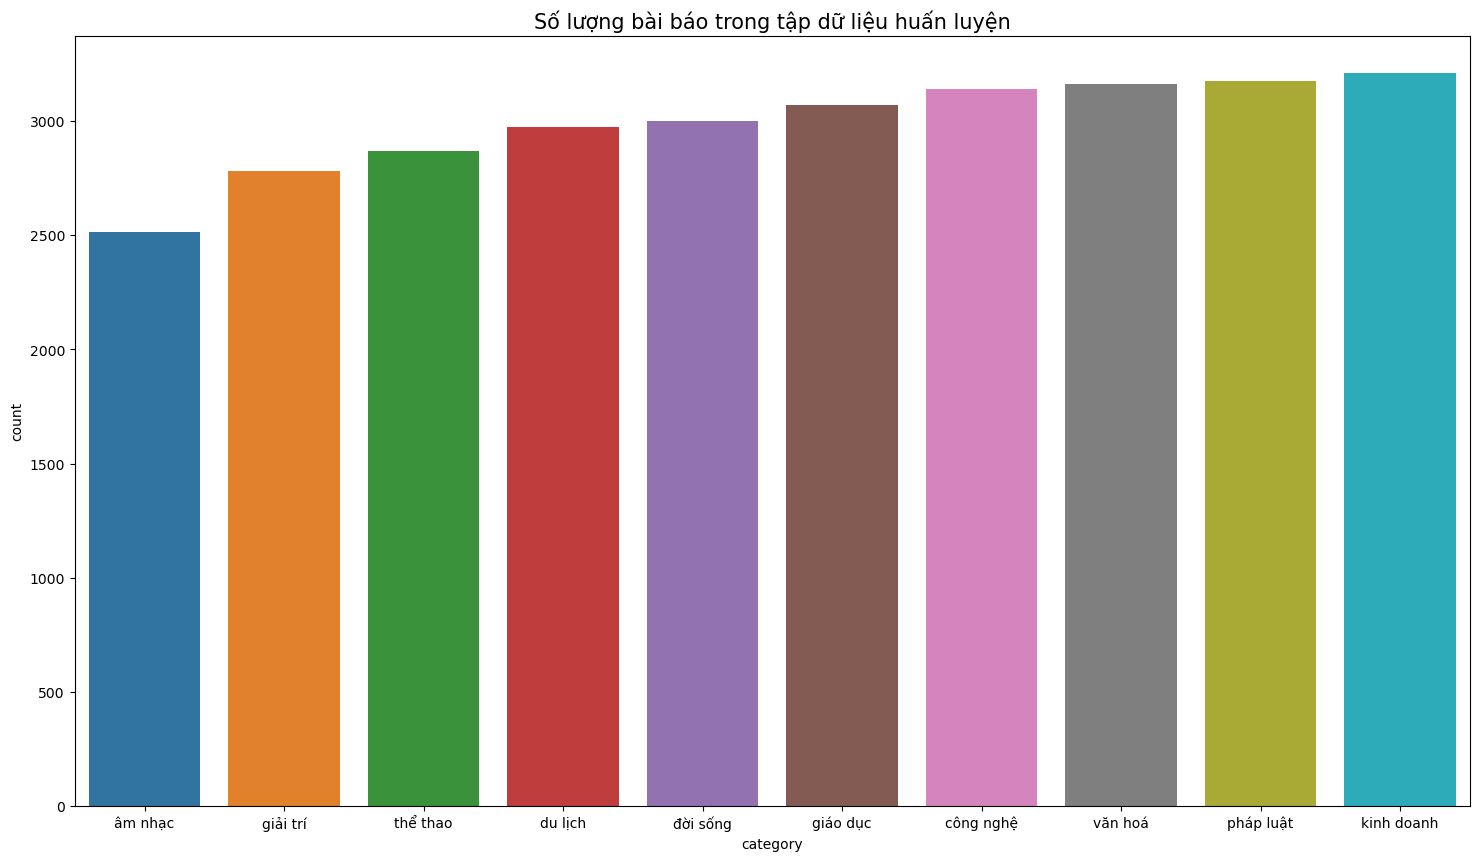

In [100]:
plt.figure(figsize= (18,10))
plt.title("Số lượng bài báo trong tập dữ liệu huấn luyện", fontdict={'fontsize': 15})
sns.countplot(data= y_train_df, x= "category", order = y_train_df['category'].value_counts(ascending=True).index)

<Axes: title={'center': 'Số lượng bài báo trong tập dữ liệu kiểm thử'}, xlabel='category', ylabel='count'>

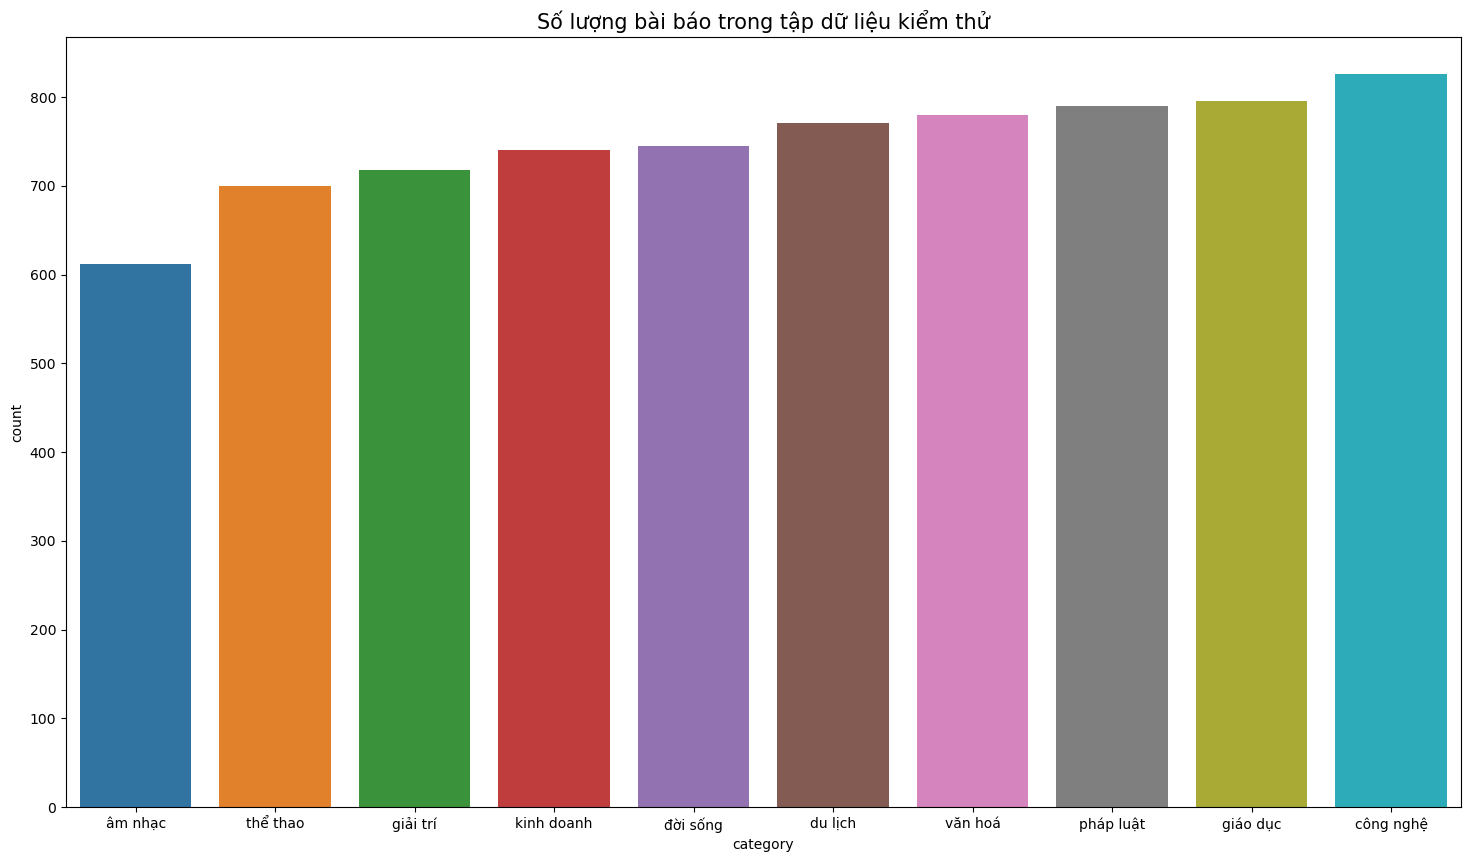

In [102]:
plt.figure(figsize= (18,10))
plt.title("Số lượng bài báo trong tập dữ liệu kiểm thử", fontdict={'fontsize': 15})
sns.countplot(data= y_test_df, x= "category", order = y_test_df['category'].value_counts(ascending=True).index)

#### Exp 1: 1 gram tokenize + Count Vectorizer

In [43]:
X_train_1gram = one_gram_tokenize(X_train)
print(len(X_train_1gram))
X_test_1gram = one_gram_tokenize(X_test)
print(len(X_test_1gram))

29906
7477


In [44]:
X_train_1gram_cv = CV(X_train_1gram, vocabulary=vocabulary_1gram_lst)
X_test_1gram_cv = CV(X_test_1gram, vocabulary=vocabulary_1gram_lst)
X_train_1gram_cv.shape

/Users/macos/anaconda3/envs/DeepLearning/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:1322: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


(29906, 91096)

In [110]:

scipy.sparse.save_npz('X_train_1gram_cv', X_train_1gram_cv)
sparse_matrix = scipy.sparse.load_npz('X_train_1gram_cv.npz')
sparse_matrix

<29906x91098 sparse matrix of type '<class 'numpy.int64'>'
	with 4976556 stored elements in Compressed Sparse Row format>

In [ ]:
scipy.sparse.save_npz('X_test_1gram_cv', X_test_1gram_cv)
sparse_matrix = scipy.sparse.load_npz('X_test_1gram_cv.npz')
sparse_matrix

<5656x70189 sparse matrix of type '<class 'numpy.int64'>'
	with 782199 stored elements in Compressed Sparse Row format>

#### Exp 2: 1 gram tokenize + TF-IDF

In [45]:
# Tf-Idf transformation
X_train_1gram_tfidf = tfidf(X_train_1gram, vocabulary=vocabulary_1gram_lst)
X_test_1gram_tfidf = tfidf(X_test_1gram, vocabulary=vocabulary_1gram_lst)
X_train_1gram_tfidf.shape

(29906, 91096)

In [ ]:
scipy.sparse.save_npz('X_train_1gram_tfidf', X_train_1gram_tfidf)
sparse_matrix = scipy.sparse.load_npz('X_train_1gram_tfidf.npz')
sparse_matrix

<22620x70189 sparse matrix of type '<class 'numpy.float64'>'
	with 3166799 stored elements in Compressed Sparse Row format>

In [ ]:
scipy.sparse.save_npz('X_test_1gram_tfidf', X_test_1gram_tfidf)
sparse_matrix = scipy.sparse.load_npz('X_test_1gram_tfidf.npz')
sparse_matrix

<5656x70189 sparse matrix of type '<class 'numpy.float64'>'
	with 782199 stored elements in Compressed Sparse Row format>

#### Exp 3: LM tokenize + CV

In [46]:
X_train_LM = LM_tokenize(X_train)
print(len(X_train_LM))
X_test_LM = LM_tokenize(X_test)
print(len(X_test_LM))

29906
7477


In [112]:
X_train_LM

[['tối',
  '256',
  'đêm',
  'kết',
  'thi',
  'hoa hậu',
  'hoàn',
  'vũ',
  'việt',
  'nam',
  '2022',
  'diễn',
  'tranh',
  'tài',
  '41',
  'đẹp',
  'khắp',
  'miền',
  'đất',
  'trải',
  'vòng',
  'thi',
  'đặc sắc',
  'top',
  'thí sinh',
  'xuất sắc',
  'lựa',
  'vòng',
  'thi',
  'gay cấn',
  'ứng xử',
  'thí sinh',
  'đầu tiên',
  'câu',
  'giám khảo',
  'hương',
  'ly',
  'câu',
  'quốc gia',
  'giới',
  'đối diện',
  'cấu',
  'dân',
  'già',
  'sinh lý',
  'phản đối',
  'hôn nhân',
  'đồng',
  'giới',
  'ủng hộ',
  'phản đối',
  'quan',
  'hương',
  'ly',
  'phép',
  'song ngữ',
  'run',
  'lúng túng',
  'phát âm',
  'yêu',
  'phụ',
  'dân',
  'già',
  'trẻ',
  'yêu',
  'yêu',
  'tình yêu',
  'phân biệt',
  'giới sắc',
  'tộc',
  'màu da',
  'hi vọng',
  'kiên định',
  'hạnh phúc',
  'đất',
  'hạnh phúc',
  'đất',
  'dân',
  'thân',
  'ngọc',
  'châu',
  'thí sinh',
  'hai',
  'ứng xử',
  'câu',
  'trẻ',
  'thể hiện',
  'tiếng',
  'mẽ',
  'vấn đề',
  'môi trường',
  'biến đ

In [49]:
X_train_LM_cv = CV(X_train_LM, vocabulary=vocabulary_LM_lst)
X_test_LM_cv = CV(X_test_LM, vocabulary=vocabulary_LM_lst)
X_train_LM_cv.shape

(29906, 95279)

In [ ]:
scipy.sparse.save_npz('X_train_LM_cv', X_train_LM_cv)
sparse_matrix = scipy.sparse.load_npz('X_train_LM_cv.npz')
sparse_matrix

<22620x73538 sparse matrix of type '<class 'numpy.int64'>'
	with 2685643 stored elements in Compressed Sparse Row format>

In [ ]:
scipy.sparse.save_npz('X_test_LM_cv', X_test_LM_cv)
sparse_matrix = scipy.sparse.load_npz('X_test_LM_cv.npz')
sparse_matrix

<5656x73538 sparse matrix of type '<class 'numpy.int64'>'
	with 663439 stored elements in Compressed Sparse Row format>

#### Exp 4: LM tokenize + TF-IDF

In [50]:
# Tf-Idf transformation

X_train_LM_tfidf = tfidf(X_train_LM, vocabulary=vocabulary_LM_lst)
X_test_LM_tfidf = tfidf(X_test_LM, vocabulary=vocabulary_LM_lst)
X_train_LM_tfidf.shape

(29906, 95279)

In [ ]:
# scipy.sparse.save_npz('X_train_LM_tfidf', X_train_LM_tfidf)
# X_train_LM_tfidf = scipy.sparse.load_npz('X_train_LM_tfidf.npz')
# X_train_LM_tfidf

In [ ]:
# scipy.sparse.save_npz('X_test_LM_tfidf', X_test_LM_tfidf)
# X_test_LM_tfidf = scipy.sparse.load_npz('X_test_LM_tfidf.npz')
# X_test_LM_tfidf

# Model training


### Initilize models for CV vectorizer and TF-IDF vectorizer

In [51]:
#create list of model and accuracy dicts
perform_list_cv = []
perform_list_TFIDF = []
def run_model(model_name, x_train, x_test, vectorizer):
    """
    model_ name: select model to run (Logistic Regression, Multinomial Naive Bayes, Random Forest),
    x_train: training set for X CV
    x_test: testing set for x CV

    """
    mdl=''
    if model_name == 'Logistic Regression':
        mdl = LogisticRegression(max_iter=100000000000)
    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier()
    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB()
    elif model_name == 'Linear SVC':
        mdl = LinearSVC()
    elif model_name == 'SVC':
        mdl = SVC()


    oneVsRest = OneVsRestClassifier(mdl)
    oneVsRest.fit(x_train, y_train)
    y_pred = oneVsRest.predict(x_test)


    # Performance metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='macro')

    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')
    print(f'Precision : {precision}')
    print(f'Recall    : {recall}')
    print(f'F1-score   : {f1score}')

    # Add performance parameters to list
    if vectorizer == 'CV':
        perform_list_cv.append(dict([
        ('Model', model_name),
        ('Test Accuracy', round(accuracy, 2)),
        ('Precision', round(precision, 2)),
        ('Recall', round(recall, 2)),
        ('F1', round(f1score, 2))
         ]))
    elif vectorizer == 'TF-IDF':
        perform_list_TFIDF.append(dict([
        ('Model', model_name),
        ('Test Accuracy', round(accuracy, 2)),
        ('Precision', round(precision, 2)),
        ('Recall', round(recall, 2)),
        ('F1', round(f1score, 2))
         ]))

### Run models for Count vectorizer


#### 1gram tokenize

In [116]:
# 1gram Tokenize
run_model('Multinomial Naive Bayes', x_train= X_train_1gram_cv, x_test= X_test_1gram_cv, vectorizer= 'CV')

Test Accuracy Score of Basic Multinomial Naive Bayes: % 76.06
Precision : 0.7842535222444015
Recall    : 0.7566507405734614
F1-score   : 0.7535929685799828


In [117]:
run_model('Logistic Regression', x_train= X_train_1gram_cv, x_test= X_test_1gram_cv, vectorizer= 'CV')

Test Accuracy Score of Basic Logistic Regression: % 86.37
Precision : 0.8645959267169543
Recall    : 0.8634515482828112
F1-score   : 0.863259396678813


In [118]:
run_model('Random Forest', x_train= X_train_1gram_cv, x_test= X_test_1gram_cv, vectorizer= 'CV')

Test Accuracy Score of Basic Random Forest: % 87.49
Precision : 0.874100864833647
Recall    : 0.8757911154682809
F1-score   : 0.871542109823206


In [119]:
run_model('SVC', x_train= X_train_1gram_cv, x_test= X_test_1gram_cv, vectorizer= 'CV')

Test Accuracy Score of Basic SVC: % 86.47
Precision : 0.863028171763364
Recall    : 0.8650463088060569
F1-score   : 0.8623014177468262


In [120]:
perfrom_lst_1gram_CV =  perform_list_cv
perfrom_lst_1gram_CV

[{'Model': 'Multinomial Naive Bayes',
  'Test Accuracy': 76.06,
  'Precision': 0.78,
  'Recall': 0.76,
  'F1': 0.75},
 {'Model': 'Logistic Regression',
  'Test Accuracy': 86.37,
  'Precision': 0.86,
  'Recall': 0.86,
  'F1': 0.86},
 {'Model': 'Random Forest',
  'Test Accuracy': 87.49,
  'Precision': 0.87,
  'Recall': 0.88,
  'F1': 0.87},
 {'Model': 'SVC',
  'Test Accuracy': 86.47,
  'Precision': 0.86,
  'Recall': 0.87,
  'F1': 0.86}]

#### LM Tokenize

In [121]:
# LM Tokenize
run_model('Multinomial Naive Bayes', x_train= X_train_LM_cv, x_test= X_test_LM_cv, vectorizer='CV')

Test Accuracy Score of Basic Multinomial Naive Bayes: % 76.65
Precision : 0.7928148033811643
Recall    : 0.7629534433535909
F1-score   : 0.7594783341463087


In [122]:
run_model('Random Forest', x_train= X_train_LM_cv, x_test= X_test_LM_cv, vectorizer='CV')

Test Accuracy Score of Basic Random Forest: % 88.14
Precision : 0.8809476253175423
Recall    : 0.8821620475377758
F1-score   : 0.8779255238401188


In [123]:
run_model('Logistic Regression', x_train= X_train_LM_cv, x_test= X_test_LM_cv, vectorizer='CV')

Test Accuracy Score of Basic Logistic Regression: % 87.24
Precision : 0.8726868528398978
Recall    : 0.871876021435955
F1-score   : 0.871467041396399


In [124]:
run_model('SVC', x_train= X_train_LM_cv, x_test= X_test_LM_cv, vectorizer='CV')

Test Accuracy Score of Basic SVC: % 86.87
Precision : 0.8680157885147027
Recall    : 0.8688662133366402
F1-score   : 0.8669665485882574


### Run model for TF-IDF vectorizer

#### 1gram Tokenize

In [129]:
run_model('Random Forest', x_train= X_train_1gram_tfidf, x_test= X_test_1gram_tfidf, vectorizer='TF-IDF')

Test Accuracy Score of Basic Random Forest: % 87.79
Precision : 0.8772289553244731
Recall    : 0.878758487505686
F1-score   : 0.874550922427621


In [130]:
run_model('Logistic Regression', x_train= X_train_1gram_tfidf, x_test= X_test_1gram_tfidf, vectorizer='TF-IDF')

Test Accuracy Score of Basic Logistic Regression: % 84.93
Precision : 0.846003392304916
Recall    : 0.8499029088637897
F1-score   : 0.8471114707403806


In [131]:
run_model('Multinomial Naive Bayes', x_train= X_train_1gram_tfidf, x_test= X_test_1gram_tfidf, vectorizer='TF-IDF')

Test Accuracy Score of Basic Multinomial Naive Bayes: % 81.06
Precision : 0.8123335916784523
Recall    : 0.8103179636155243
F1-score   : 0.8097596471846895


In [132]:
run_model('SVC', x_train= X_train_1gram_tfidf, x_test= X_test_1gram_tfidf, vectorizer='TF-IDF')

Test Accuracy Score of Basic SVC: % 88.0
Precision : 0.8779407626407089
Recall    : 0.8807085474018909
F1-score   : 0.878210053447907


#### LM Tokenize

In [134]:
run_model('Logistic Regression', x_train= X_train_LM_tfidf, x_test= X_test_LM_tfidf, vectorizer= 'TF-IDF')

Test Accuracy Score of Basic Logistic Regression: % 85.66
Precision : 0.8542696270904887
Recall    : 0.8571973906940474
F1-score   : 0.8551050474337636


In [135]:
run_model('Random Forest',  x_train= X_train_LM_tfidf, x_test= X_test_LM_tfidf, vectorizer= 'TF-IDF')

Test Accuracy Score of Basic Random Forest: % 88.08
Precision : 0.8797774058689509
Recall    : 0.8815716889918059
F1-score   : 0.8772573672676277


In [136]:
run_model('Multinomial Naive Bayes',  x_train= X_train_LM_tfidf, x_test= X_test_LM_tfidf, vectorizer= 'TF-IDF')

Test Accuracy Score of Basic Multinomial Naive Bayes: % 82.71
Precision : 0.8247965461505485
Recall    : 0.8277497652080836
F1-score   : 0.8240265312850938


In [137]:
run_model('SVC', x_train= X_train_LM_tfidf, x_test= X_test_LM_tfidf, vectorizer= 'TF-IDF')

Test Accuracy Score of Basic SVC: % 88.69
Precision : 0.8851331484118983
Recall    : 0.8873103764110404
F1-score   : 0.8852249805579933


### Dimesion reduction

### Hyper-parameters tuning


#### Random Forest

In [47]:
kf=KFold(n_splits=5, shuffle=True, random_state=55)

In [69]:
opt_mdl_RF = RandomForestClassifier()
oneVsRest_RF = OneVsRestClassifier(opt_mdl_RF)
oneVsRest_RF.get_params().keys()

dict_keys(['estimator__bootstrap', 'estimator__ccp_alpha', 'estimator__class_weight', 'estimator__criterion', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__max_samples', 'estimator__min_impurity_decrease', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__n_estimators', 'estimator__n_jobs', 'estimator__oob_score', 'estimator__random_state', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs'])

In [63]:
param_RF = {'estimator__n_estimators':[25, 50, 100],
                'estimator__criterion': ['gini', 'entropy'], 'estimator__max_depth': [int(x) for x in np.linspace(10, 100, num = 12)],
                'estimator__min_samples_leaf': [1, 3, 4], 'estimator__min_samples_split': [2, 6, 10]}

In [65]:
# GridSearchCV
RF_grid = HalvingGridSearchCV(oneVsRest_RF, param_grid = param_RF, cv = kf, scoring='accuracy', n_jobs=-1, min_resources="exhaust", factor=3)
RF_grid.fit(X_train_LM_cv, y_train)
RF_grid.best_params_

{'estimator__criterion': 'entropy',
 'estimator__max_depth': 75,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 6,
 'estimator__n_estimators': 100}

In [70]:
# GridSearchCV
RF_grid_2 = HalvingGridSearchCV(oneVsRest_RF, param_grid = param_RF, cv = kf, scoring='accuracy', n_jobs=-1, min_resources="exhaust", factor=3)
RF_grid_2.fit(X_train_LM_tfidf, y_train)
RF_grid_2.best_params_

{'estimator__criterion': 'gini',
 'estimator__max_depth': 100,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 10,
 'estimator__n_estimators': 100}

#### SVM

In [45]:
param_SVC = {
    'estimator__C': [0.1, 1, 10],
    'estimator__kernel': ['linear', 'rbf', 'poly'],
    'estimator__gamma': ['scale', 'auto'],
    'estimator__degree': [3, 5, 10]
}

In [46]:
opt_mdl_SVC = SVC(max_iter=1000000)
oneVsRest_SVC = OneVsRestClassifier(opt_mdl_SVC)
oneVsRest_SVC.get_params().keys()

dict_keys(['estimator__C', 'estimator__break_ties', 'estimator__cache_size', 'estimator__class_weight', 'estimator__coef0', 'estimator__decision_function_shape', 'estimator__degree', 'estimator__gamma', 'estimator__kernel', 'estimator__max_iter', 'estimator__probability', 'estimator__random_state', 'estimator__shrinking', 'estimator__tol', 'estimator__verbose', 'estimator', 'n_jobs'])

In [47]:
# GridSearchCV
halving_svc_grid = HalvingGridSearchCV(oneVsRest_SVC, param_grid = param_SVC, cv = kf, scoring='f1_micro', n_jobs=-1, min_resources="exhaust", factor=3)
halving_svc_grid.fit(X_train_LM_tfidf, y_train)
halving_svc_grid.best_params_

{'estimator__C': 10,
 'estimator__degree': 5,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf'}

In [1]:
print("dcm")

dcm


### Optimized model


In [54]:
target_name = [f"Class {i}" for i in range (0,10)]
target_name

['Class 0',
 'Class 1',
 'Class 2',
 'Class 3',
 'Class 4',
 'Class 5',
 'Class 6',
 'Class 7',
 'Class 8',
 'Class 9']

In [67]:
opt_RF = RandomForestClassifier(criterion='entropy', max_depth=75, min_samples_leaf=1
                                ,min_samples_split=6, n_estimators=100)



oneVsRest_RF = OneVsRestClassifier(opt_RF)
oneVsRest_RF.fit(X_train_LM_cv, y_train)
y_pred_RF = oneVsRest_RF.predict(X_test_LM_cv)

print(classification_report(y_test, y_pred_RF, target_names=target_name))

              precision    recall  f1-score   support

     Class 0       0.86      0.96      0.91       612
     Class 1       0.89      0.79      0.84       780
     Class 2       0.85      0.92      0.88       771
     Class 3       0.79      0.90      0.84       826
     Class 4       0.92      0.96      0.94       795
     Class 5       0.88      0.60      0.71       745
     Class 6       0.85      0.79      0.82       718
     Class 7       0.83      0.84      0.84       740
     Class 8       0.90      0.97      0.94       790
     Class 9       0.95      0.99      0.97       700

    accuracy                           0.87      7477
   macro avg       0.87      0.87      0.87      7477
weighted avg       0.87      0.87      0.87      7477



In [95]:
opt_RF_2 = RandomForestClassifier(criterion='gini', max_depth=100, min_samples_leaf=1
                                ,min_samples_split=10, n_estimators=100)



oneVsRest_RF_2 = OneVsRestClassifier(opt_RF_2)
oneVsRest_RF_2.fit(X_train_LM_tfidf, y_train)
y_pred_RF_2 = oneVsRest_RF_2.predict(X_test_LM_tfidf)

print(classification_report(y_test, y_pred_RF_2, target_names=target_name))

              precision    recall  f1-score   support

     Class 0       0.83      0.98      0.90       612
     Class 1       0.90      0.79      0.84       780
     Class 2       0.85      0.94      0.89       771
     Class 3       0.84      0.90      0.87       826
     Class 4       0.92      0.97      0.94       795
     Class 5       0.87      0.61      0.72       745
     Class 6       0.86      0.79      0.82       718
     Class 7       0.84      0.84      0.84       740
     Class 8       0.90      0.97      0.94       790
     Class 9       0.94      0.99      0.97       700

    accuracy                           0.88      7477
   macro avg       0.88      0.88      0.87      7477
weighted avg       0.88      0.88      0.87      7477



In [ ]:
print(y_test.unique())

[6 4 0 7 8 1 3 5 9 2]


In [61]:
opt_SVC = SVC(C=10, gamma='scale', kernel='rbf', degree=5)


oneVsRest_SVC = OneVsRestClassifier(opt_SVC)
oneVsRest_SVC.fit(X_train_LM_tfidf, y_train)
y_pred_SVC = oneVsRest_SVC.predict(X_test_LM_tfidf)


In [62]:
print(classification_report(y_test, y_pred_SVC, target_names=target_name))

              precision    recall  f1-score   support

     Class 0       0.92      0.95      0.93       612
     Class 1       0.86      0.86      0.86       780
     Class 2       0.88      0.95      0.91       771
     Class 3       0.91      0.91      0.91       826
     Class 4       0.95      0.96      0.95       795
     Class 5       0.82      0.74      0.78       745
     Class 6       0.89      0.81      0.85       718
     Class 7       0.86      0.87      0.86       740
     Class 8       0.95      0.96      0.96       790
     Class 9       0.96      0.99      0.97       700

    accuracy                           0.90      7477
   macro avg       0.90      0.90      0.90      7477
weighted avg       0.90      0.90      0.90      7477



### DL Model

In [81]:
tf.keras.backend.clear_session()

In [85]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)


In [86]:
print(gpus)

[]


In [36]:
num_classes = 10

In [37]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

#### Validation split

In [28]:
# For CNN + LSTM
X_train_rest, X_valid, y_train_rest, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=37)
print ("Shape of training set is: ", len(X_train_rest))
print ("Shape of validation set is: ", len(X_valid))
print ("Shape of test set is: ", len(X_test))

Shape of training set is:  23924
Shape of validation set is:  5982
Shape of test set is:  7477


In [76]:
X_test

31052    216 nêu quan luận tội đại diện viện ksnd hà nộ...
15753    bloomberg 117 phiên thể thao apple watch pro s...
23541    nghị án trưa 286 tand huyện sóc sơn hà nội tuy...
35587    new zealand thi đấu costa rica sân ahmad bin a...
2937                                        đỗ an tổng hợp
                               ...                        
10940    dailyxe gửi bảng giá xe kia lăn bánh phù hợp g...
32865    my liberation notes nhật ký phim khán giả yêu ...
13066    tham dự lễ ukraine đại diện đơn vị tổ chức phi...
7189     im lặng sợ sợ hãi mím môi sợ cảm giác tất vờ t...
6716     50000 đồng toản khoe thể battlefield 2042 game...
Name: text_cleaned, Length: 7477, dtype: object

In [38]:
# For MLP
X_train_LMTFIDF_rest, X_valid_LMTFIDF, y_train_rest_LMTFIDF, y_valid_LMTFIDF = train_test_split(X_train_LM_tfidf, y_train, test_size=0.2, random_state=37)

In [39]:
X_train_LMTFIDF_rest

<23924x95296 sparse matrix of type '<class 'numpy.float64'>'
	with 3380244 stored elements in Compressed Sparse Row format>

#### MLP

In [48]:
callbacks_MLP=[
    # EarlyStopping(
    # monitor='val_accuracy',
    # min_delta=1e-4,
    # patience=4,
    # verbose=1
# ),
ModelCheckpoint(filepath='weights_MLP.h5',
                monitor='val_accuracy',
                mode='max',
                save_best_only=True,
                save_weights_only=True,
                verbose=1)]


In [52]:
callbacks_MLP_2=[
    # EarlyStopping(
    # monitor='val_accuracy',
    # min_delta=1e-4,
    # patience=4,
    # verbose=1
# ),
ModelCheckpoint(filepath='weights_MLP.h5',
                monitor='val_accuracy',
                mode='max',
                save_best_only=True,
                save_weights_only=True,
                verbose=1)]


In [50]:
input_dim = X_train_LMTFIDF_rest.shape[1]

# Mô hình
model_MLP = Sequential()
model_MLP.add(Dense(1024, input_dim=input_dim, activation='relu'))
model_MLP.add(Dense(1024, activation='relu'))
model_MLP.add(Dense(512, activation='relu'))
model_MLP.add(Dense(256, activation='relu'))
model_MLP.add(Dense(128, activation='relu'))
model_MLP.add(Dense(64, activation='relu'))
model_MLP.add(Dropout(0.25))
model_MLP.add(Dense(32, activation='relu'))
model_MLP.add(Dropout(0.25))
model_MLP.add(Dense(num_classes, activation='softmax'))
model_MLP.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [51]:
# Mô hình
model_MLP_2 = Sequential()
model_MLP_2.add(Dense(1024, input_dim=input_dim, activation='relu'))
model_MLP_2.add(Dense(512, activation='relu'))
model_MLP_2.add(Dense(256, activation='relu'))
model_MLP_2.add(Dense(128, activation='relu'))
model_MLP_2.add(Dense(64, activation='relu'))
model_MLP_2.add(Dropout(0.25))
model_MLP_2.add(Dense(32, activation='relu'))
model_MLP_2.add(Dropout(0.25))
model_MLP_2.add(Dense(num_classes, activation='softmax'))
model_MLP_2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [42]:
model_MLP.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              97584128  
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0

In [43]:
print (X_train_LMTFIDF_rest.shape)
print (y_train_rest_LMTFIDF.shape)

(23924, 95296)
(23924,)


In [44]:
X_train_LM_TFIDF_rest = X_train_LMTFIDF_rest.toarray()
print (type(X_train_LMTFIDF_rest))
X_valid_LMTFIDF = X_valid_LMTFIDF.toarray()
print (type(X_valid_LMTFIDF))

<class 'scipy.sparse._csr.csr_matrix'>
<class 'numpy.ndarray'>


In [47]:
history_MLP = model_MLP.fit(X_train_LM_TFIDF_rest, y_train_rest_LMTFIDF,
                    epochs=25,
                    verbose=True,
                    validation_data=(X_valid_LMTFIDF, y_valid_LMTFIDF),
                    batch_size=128,
                    callbacks= callbacks_MLP)

Epoch 1/25
187/187 [==============================] - ETA: 0s - loss: 0.3943 - accuracy: 0.8947
Epoch 1: val_accuracy improved from -inf to 0.85523, saving model to weights_MLP.h5
187/187 [==============================] - 114s 592ms/step - loss: 0.3943 - accuracy: 0.8947 - val_loss: 0.5520 - val_accuracy: 0.8552
Epoch 2/25
187/187 [==============================] - ETA: 0s - loss: 0.1977 - accuracy: 0.9510
Epoch 2: val_accuracy improved from 0.85523 to 0.85624, saving model to weights_MLP.h5
187/187 [==============================] - 221s 1s/step - loss: 0.1977 - accuracy: 0.9510 - val_loss: 0.6453 - val_accuracy: 0.8562
Epoch 3/25
187/187 [==============================] - ETA: 0s - loss: 0.1236 - accuracy: 0.9698
Epoch 3: val_accuracy did not improve from 0.85624
187/187 [==============================] - 280s 1s/step - loss: 0.1236 - accuracy: 0.9698 - val_loss: 0.7321 - val_accuracy: 0.8556
Epoch 4/25
187/187 [==============================] - ETA: 0s - loss: 0.0826 - accuracy: 0.

In [53]:
history_MLP_2 = model_MLP_2.fit(X_train_LM_TFIDF_rest, y_train_rest_LMTFIDF,
                    epochs=25,
                    verbose=True,
                    validation_data=(X_valid_LMTFIDF, y_valid_LMTFIDF),
                    batch_size=128,
                    callbacks= callbacks_MLP_2)

Epoch 1/25
187/187 [==============================] - ETA: 0s - loss: 1.0102 - accuracy: 0.6723

: 

: 

In [3]:
plot_history(history_MLP)

NameError: name 'history_MLP' is not defined

In [111]:
preds_MLP = [np.argmax(i) for i in model_MLP.predict(X_test_LM_tfidf.toarray())]

177/177 [==============================] - 21s 86ms/step


In [112]:
# Performance metrics
accuracy_MLP = round(accuracy_score(y_test, preds_MLP) * 100, 2)
# Get precision, recall, f1 scores
precision_MLP, recall_MLP, f1score_MLP, support_MLP = score(y_test, preds_MLP, average='macro')

print(f'Test Accuracy Score of MLP model: %{accuracy_MLP}')
print(f'Precision : {precision_MLP}')
print(f'Recall    : {recall_MLP}')
print(f'F1-score   : {f1score_MLP}')

Test Accuracy Score of MLP model: %86.01
Precision : 0.7620839457905031
Recall    : 0.7442994717869726
F1-score   : 0.745659150895885


#### Word Embedding + CNN

##### Word Embedding

In [29]:
text_train_rest = np.array(X_train_rest)
text_valid = np.array(X_valid)
text_test = np.array(X_test)

tokenizer = Tokenizer(num_words=12000)
tokenizer.fit_on_texts(text_train_rest)

X_train_rest = tokenizer.texts_to_sequences(text_train_rest)
X_val = tokenizer.texts_to_sequences(text_valid)
X_test = tokenizer.texts_to_sequences(text_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

In [30]:
print (len(y_valid))

5982


In [31]:
vocab_size

75995

In [80]:
text_train_rest

array(['sưu tập trần quốc dũng ấp chuẩn cảm hứng sắc màu sống lăng kính cảm biến quen trở thành hình ảnh đẹp lạ thiết kế gửi gắm sưu tập chút triết lý đời phương đông thuyết ngũ hành khái niệm hình tượng hóa trở mẻ biệt lựa chất liệu đa dạng phong phú đậm nét đông đồng thời cảm hứng đương đại gũi thời ngũ hành vật chất đem hiện tượng nhiên thể vận động hóa vật chất thiên nhiên tạng phủ thể quy luật tương sinh ta giới nhiên rung động đẹp mắt thể hiện vague chân thực xác thiết kế trần quốc dũng thổ lộ lâm thu hằng trang đậm nhấn chân mày đôi môi dáng quyến rũ phô diễn nét đẹp ma mị lâm thu hằng tốp thi hoa hậu việt nam 2008 chiến thắng giải phụ hoa hậu biển tham gia thi siêu mẫu việt nam 2008 lọt tốp 10 đồng thời đoạt giải hình thể đẹp',
       'video hồ hoài hồng đăng đi golf tây ban nha thời gian thông xoay quanh nhạc sĩ hồ hoài diễn viên hồng đăng liên tục chiếm sóng mạng xã hội bắt báo chí đăng tải thông nghệ sĩ việt nam cáo buộc công tình dục gái 17 sạn đảo mallorca tây ban nha nghi

In [81]:
text_test

array(['216 nêu quan luận tội đại diện viện ksnd hà nội đề nghị hđxx chấp kháng cáo cựu chủ tịch ubnd tp hà nội nguyễn đức cáo nguyễn trường giang cựu giám đốc công ty tnhh dịch vụ arktic công ty arktic đơn kháng cáo vợ võ tiến hùng cựu tổng giám đốc công ty tnhh mtv thoát hà nội dỡ lệnh kê biên tài sản đứng hai vợ chồng viện kiểm sát đề nghị hđxx chấp yêu cầu viện kiểm sát tòa sơ thẩm tuyên tù nguyễn đức gửi đơn kháng cáo toàn án phạm tội lợi dụng chức vụ quyền hạn thi hành công vụ nhiên khai cáo nguyễn trường giang võ tiến hùng liên quan toàn hồ sơ vụ án quan tố tụng kết luận cáo nguyễn đức chức chủ tịch ubnd tp hà nội kiện công ty arktic thông cáo giang tham gia trình mua thương hợp đồng nhập khẩu chế phẩm redoxy3c tiếp cáo đạo võ tiến hùng mua chế phẩm xử lý nhiễm nguyễn trường giang thông công ty arktic hành vi cáo trái quy định pháp luật viện kiểm sát hđxx sơ thẩm xét đánh giá hình tuyên tù tòa tuyên cáo giang tù vai trò đồng phạm phù hợp hành vi cáo sơ thẩm buộc bồi 69 thiệt hại

In [82]:
text_train_lst = list(text_train_rest)
print(len(text_train_rest[0]))
print (len(X_train_rest[0]))

735
160


In [32]:
def get_maxlen(data):
    return max([len(i) for i in data])

maxlen = get_maxlen(data=data["text_cleaned"])

X_train_rest = pad_sequences(X_train_rest, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [33]:
X_val = pad_sequences(X_val, padding='post', maxlen=maxlen)

In [85]:
X_val

array([[  25,    7,  240, ...,    0,    0,    0],
       [  29,   45,   60, ...,    0,    0,    0],
       [1722,  141,   14, ...,    0,    0,    0],
       ...,
       [   8, 3110, 5056, ...,    0,    0,    0],
       [ 629,    2,  290, ...,    0,    0,    0],
       [1436, 1472,  137, ...,    0,    0,    0]], dtype=int32)

In [86]:
y_train_rest

33171    6
17749    6
9997     2
30078    5
12340    1
        ..
3994     3
32157    4
6186     3
28045    5
22946    8
Name: category_id, Length: 23924, dtype: int64

In [87]:
maxlen

16886

In [34]:
embedding_dim = 64

##### CNN Model

In [88]:
callbacks_CNN=[
    EarlyStopping(
    monitor='val_accuracy',
    min_delta=1e-4,
    patience=4,
    verbose=1
),
ModelCheckpoint(filepath='weights_CNN.h5',
                monitor='val_accuracy',
                mode='max',
                save_best_only=True,
                save_weights_only=True,
                verbose=1)]


In [91]:
model_CNN = Sequential()
model_CNN.add(Embedding(vocab_size, embedding_dim, input_length=maxlen))
model_CNN.add(layers.Conv1D(512, 5, activation='relu'))
model_CNN.add(layers.GlobalMaxPooling1D())
model_CNN.add(Dense(1024, activation='relu'))
model_CNN.add(Dense(512, activation='relu'))
model_CNN.add(Dense(256, activation='relu'))
model_CNN.add(Dense(128, activation='relu'))
model_CNN.add(Dense(64, activation='relu'))
model_CNN.add(Dropout(0.25))
model_CNN.add(Dense(32, activation='relu'))
model_CNN.add(Dropout(0.25))
model_CNN.add(Dense(num_classes, activation='softmax'))
model_CNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_CNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 16886, 64)         4863680   
                                                                 
 module_wrapper_2 (ModuleWra  (None, 16882, 512)       164352    
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (None, 512)              0         
 pper)                                                           
                                                                 
 dense_6 (Dense)             (None, 1024)              525312    
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dense_8 (Dense)             (None, 256)              

In [ ]:
history_CNN = model_CNN.fit(X_train_rest, y_train_rest,
                    epochs=25,
                    verbose=False,
                    validation_data=(X_val, y_valid),
                    batch_size=32,
                    callbacks=callbacks_CNN)


Epoch 1: val_accuracy improved from -inf to 0.74735, saving model to weights_CNN.h5

Epoch 2: val_accuracy improved from 0.74735 to 0.80261, saving model to weights_CNN.h5

Epoch 3: val_accuracy improved from 0.80261 to 0.82869, saving model to weights_CNN.h5

Epoch 4: val_accuracy improved from 0.82869 to 0.83864, saving model to weights_CNN.h5

Epoch 5: val_accuracy improved from 0.83864 to 0.84372, saving model to weights_CNN.h5

Epoch 6: val_accuracy did not improve from 0.84372

Epoch 7: val_accuracy did not improve from 0.84372

Epoch 8: val_accuracy did not improve from 0.84372

Epoch 9: val_accuracy improved from 0.84372 to 0.84439, saving model to weights_CNN.h5

Epoch 10: val_accuracy did not improve from 0.84439

Epoch 11: val_accuracy did not improve from 0.84439

Epoch 12: val_accuracy did not improve from 0.84439

Epoch 13: val_accuracy improved from 0.84439 to 0.84505, saving model to weights_CNN.h5

Epoch 14: val_accuracy did not improve from 0.84505

Epoch 15: val_acc

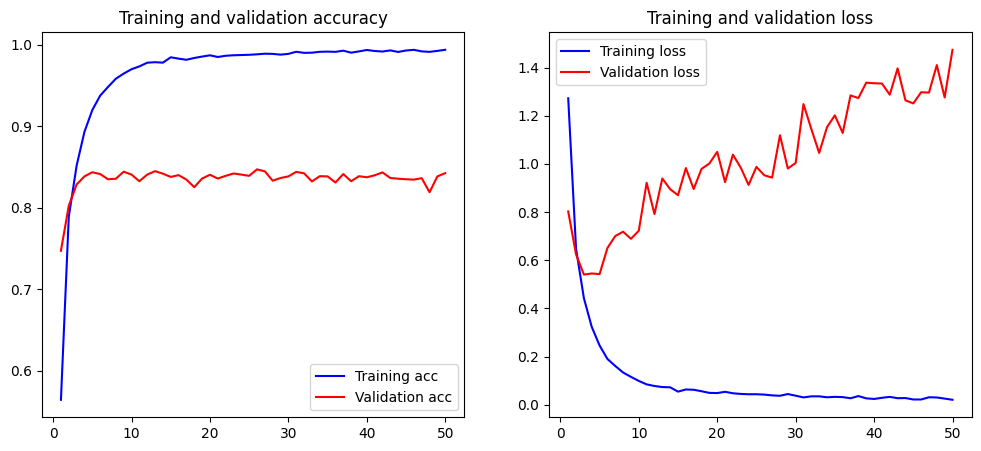

In [ ]:
plot_history(history_CNN)

In [93]:
preds_CNN = [np.argmax(i) for i in model_CNN.predict(X_test)]


234/234 [==============================] - 327s 1s/step


In [94]:
# Performance metrics
accuracy_CNN = round(accuracy_score(y_test, preds_CNN) * 100, 2)
# Get precision, recall, f1 scores
precision_CNN, recall_CNN, f1score_CNN, support_CNN = score(y_test, preds_CNN, average='macro')

print(f'Test Accuracy Score of CNN model: %{accuracy_CNN}')
print(f'Precision : {precision_CNN}')
print(f'Recall    : {recall_CNN}')
print(f'F1-score   : {f1score_CNN}')

Test Accuracy Score of CNN model: %85.21
Precision : 0.8516700104032966
Recall    : 0.852370329329065
F1-score   : 0.851713880155511


#### LSTM

In [35]:
callbacks_LSTM = [EarlyStopping(
    monitor='val_accuracy',
    min_delta=1e-4,
    patience=4,
    verbose=1
),
ModelCheckpoint(filepath='weights_LSTM.h5',
                monitor='val_accuracy',
                mode='max',
                save_best_only=True,
                save_weights_only=True,
                verbose=1)]


In [38]:
model_LSTM=Sequential()
model_LSTM.add(Embedding(vocab_size, embedding_dim, input_length=maxlen))
model_LSTM.add(Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True, recurrent_dropout=0.5)))
model_LSTM.add(Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True, recurrent_dropout=0.25)))
model_LSTM.add(layers.GlobalMaxPooling1D())
model_LSTM.add(Dense(num_classes, activation='softmax'))
model_LSTM.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 16886, 64)         4863680   
                                                                 
 bidirectional_2 (Bidirectio  (None, 16886, 128)       66048     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 16886, 64)        41216     
 nal)                                                            
                                                                 
 module_wrapper_1 (ModuleWra  (None, 64)               0         
 pper)                                                           
                                                                 
 dense (Dense)               (None, 10)                650       
                                                      

In [39]:
model_LSTM.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [40]:
# model.fit(X_train,y_train,batch_size=256,validation_data=(X_test,y_test),epochs=25,callbacks=callbacks)

history_LSTM = model_LSTM.fit(X_train_rest, y_train_rest,
                    epochs=15,
                    verbose=False,
                    validation_data=(X_val, y_valid),
                    batch_size=32,
                    callbacks=callbacks_LSTM)


Epoch 1: val_accuracy improved from -inf to 0.75109, saving model to weights_LSTM.h5

Epoch 2: val_accuracy improved from 0.75109 to 0.76730, saving model to weights_LSTM.h5

Epoch 3: val_accuracy improved from 0.76730 to 0.80575, saving model to weights_LSTM.h5

Epoch 4: val_accuracy improved from 0.80575 to 0.81595, saving model to weights_LSTM.h5

Epoch 5: val_accuracy improved from 0.81595 to 0.82230, saving model to weights_LSTM.h5

Epoch 6: val_accuracy improved from 0.82230 to 0.82782, saving model to weights_LSTM.h5

Epoch 7: val_accuracy did not improve from 0.82782

Epoch 8: val_accuracy did not improve from 0.82782

Epoch 9: val_accuracy did not improve from 0.82782

Epoch 10: val_accuracy did not improve from 0.82782
Epoch 10: early stopping


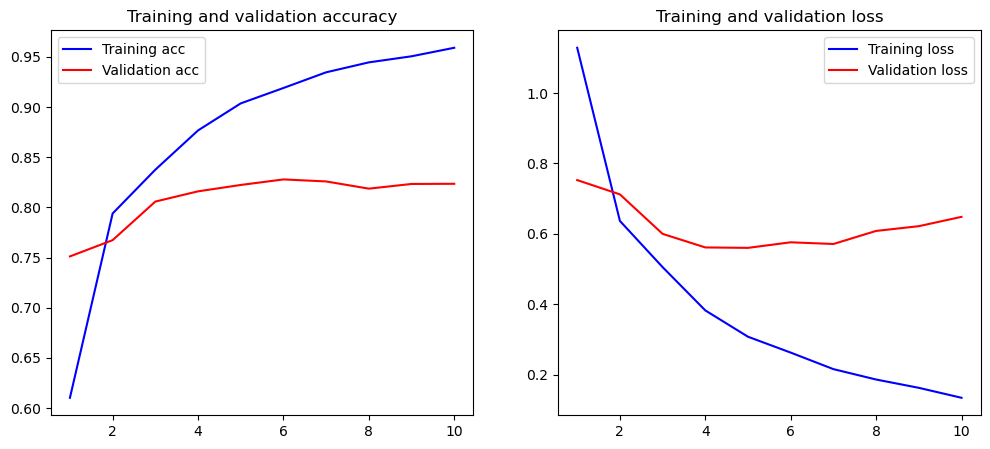

In [41]:
plot_history(history_LSTM)

In [42]:
preds_LSTM = [np.argmax(i) for i in model_LSTM.predict(X_test)]


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x7f7cc1fe36d0>
Traceback (most recent call last):
  File "/Users/macos/anaconda3/envs/DeepLearning/lib/python3.10/weakref.py", line 370, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt: 


KeyboardInterrupt: 

In [149]:
preds_LSTM_val =  [np.argmax(i) for i in model_LSTM.predict(X_val)]
accuracy_LSTM_val = round(accuracy_score(y_valid, preds_LSTM_val) * 100, 2)
accuracy_LSTM_val

142/142 [==============================] - 454s 3s/step


84.24

In [148]:
# Performance metrics
accuracy_LSTM = round(accuracy_score(y_test, preds_LSTM) * 100, 2)
# Get precision, recall, f1 scores
precision_LSTM, recall_LSTM, f1score_LSTM, support_LSTM = score(y_test, preds_LSTM, average='macro')

print(f'Test Accuracy Score of LSTM model: %{accuracy_LSTM}')
print(f'Precision : {precision_LSTM}')
print(f'Recall    : {recall_LSTM}')
print(f'F1-score   : {f1score_LSTM}')

Test Accuracy Score of LSTM model: %84.92
Precision : 0.7207846128841238
Recall    : 0.7031861183322641
F1-score   : 0.7094479778498964


# Model Demo

In [263]:
tfidf_vect = TfidfVectorizer(preprocessor=dummy, tokenizer=dummy, vocabulary=vocabulary_LM_lst, ngram_range=(1, 4))
tfidf_vect.fit(X_train_LM)

# Create Preprocessing pipeline
def Text_Preprocessing(text, tokenize=False):
    
    # Normalize
    text = clean_text(text)

    # Remove Stopwords
    text = remove_stopwords(text)
    if tokenize == True:
        text = LM_tokenize([text])
    return text
    

/Users/macos/anaconda3/envs/DeepLearning/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/macos/anaconda3/envs/DeepLearning/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:1322: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


## Load model

### Deep Learning

In [109]:
# MLP
model_MLP.load_weights('weights_MLP.h5')

In [92]:
#CNN
model_CNN.load_weights('/Users/macos/Downloads/weights_CNN (1).h5')

In [119]:
model_LSTM.load_weights('weights_LSTM.h5')

In [313]:
def modelDemo_ML (news_text,id_to_category, model):
  """
  news_text: new text needs to categorize
  id_to_category: dictionary contains category ids
  model: Logistic Regression or SVM
  """
  if model == "Logistic Regression":
    y_preds_LogReg = tuple(oneVsRest_LogReg.predict(news_text))
    result = [id_to_category[y_pred_LogReg] for y_pred_LogReg in y_preds_LogReg]
    print(result)
  
  elif model == "SVM":
    y_preds_SVC = tuple(oneVsRest_SVC.predict(news_text))
    result = [id_to_category[y_pred_SVC] for y_pred_SVC in y_preds_SVC]
    print(result)

def modelDemo_DL(news_text, id_to_category, model, labels_true, padding = False):
  """
  news_text: list of test text
  id_to_category: dict contains category ids
  label_true: list of true label
  """

  # For CNN and LSTM
  if padding == True:
    test_seq = pad_sequences(tokenizer.texts_to_sequences(news_text), maxlen=maxlen)
    test_preds = [id_to_category[np.argmax(i)] for i in model.predict(test_seq)]

    for label_true, label in zip(labels_true, test_preds):
      # print('{} - {}'.format(news, label))
      print('{} - {}'.format(colored(label_true, 'green'), colored(label, 'red')))
      
  
  # For MLP
  else:
    test_preds = [id_to_category[np.argmax(i)] for i in model.predict(news_text)]
    print (test_preds)


## Classify new data

### Text

In [214]:
# Kinh doanh
text = "Tâm lý lạc quan tiếp tục áp đảo trên thị trường vàng, nhưng giới phân tích Phố Wall và các nhà đầu tư nhỏ lẻ đều không mong đợi một sự đột phá lớn. 20 nhà phân tích Phố Wall đã tham gia cuộc khảo sát của Kitco News, với chín nhà phân tích (45%) lần lượt dự báo giá vàng tăng và đi ngang trong tuần. Ở chiều ngược lại, chỉ có hai chuyên gia (10%) dự báo kim loại quý giảm. Với nhà đầu tư nhỏ lẻ, trong gần 600 người tham gia khảo sát, 61% dự đoán thị trường vàng sẽ kết thúc tuần này trong sắc xanh, 25% cho rằng vàng sẽ giảm, còn 14% dự báo thị trường đi ngang. Tâm lý lạc quan của nhà đầu tư nhỏ lẻ đã tăng lên mức cao nhất trong một tháng. Tuy nhiên, nhiều nhà đầu tư hoài nghi về khả năng bứt phá của thị trường khi vàng đang tiến gần các ngưỡng kháng cự mạnh. Daniel Pavilonis, chiến lược gia thị trường cấp cao tại RJO Futures, cho rằng trong khi dữ liệu lạm phát yếu sẽ tiếp tục hỗ trợ giá vàng, có lý do khiến nhà đầu tư nên thận trọng là lộ trình lãi suất của Cục Dự trữ liên bang Mỹ (Fed). Nhiều nhà đầu tư tiếp tục chọn chờ đợi Fed phát tín hiệu rằng họ đã sẵn sàng ngừng tăng lãi suất. Pavilonis lưu ý rằng vẫn chưa có đủ thông tin để đưa ra câu trả lời dứt khoát về vấn đề này hiện tại. Tuy nhiên, chuyên gia này cho rằng một khi Fed đã hoàn tất việc tăng lãi suất thì vàng có thể dễ dàng cất cánh. Vàng vẫn hấp dẫn bởi trong môi trường tỷ giá ổn định, có những yếu tố khác có thể thúc đẩy kim loại quý này. Một khi Fed thực hiện xong việc tăng lãi suất, các nhà đầu tư sẽ chuyển sang vàng như một nơi trú ẩn an toàn, Pavilonis nhận xét."

# Thể thao
text2 = r"Ở cú giao bóng quyết định, Alcaraz có lợi thế tấn công và đánh thuận tay chéo sân khiến Djokovic vất vả trả bóng rúc lưới. Ngay lập tức tay vợt số một thế giới ngã xuống sân và ôm mặt xúc động. Nhưng theo tay vợt 20 tuổi, bước ngoặt trận đấu là loạt tie-break trong set hai, khi anh có cơ hội thắng nhưng phải đỡ bóng. Alcaraz trả giao bóng một ghi điểm trực tiếp để cân bằng tỷ số 1-1. Nếu thua set đó, có thể tôi đã thất bại trắng 0-3, tay vợt Tây Ban Nha nói. Set thắng đó tiếp thêm động lực để tôi tiếp tục chiến đấu và hy vọng vào chiến thắng Sau trận, Djokovic nói rằng Alcaraz sở hữu những phẩm chất của anh, Roger Federer và Rafael Nadal gộp lại. Khi nghe phóng viên thuật lại lời nói của đàn anh, Alcaraz cười ngượng: Chưa có ai thế thế về tôi. Tôi tự cảm thấy mình có lối đánh toàn diện, về sức mạnh, sức bền và tâm lý. Có thể anh ấy nói đúng, nhưng tôi không muốn nghĩ nhiều về điều đó. Trong cuộc trò chuyện ngắn với Quốc vương Tây Ban Nha Felipe VI sau trận, Alcaraz nói rằng anh đã sợ phạm phải sai lầm giống Federer. Tại chung kết Wimbledon 2019, Federer có lúc giao bóng trước hai cơ hội vô địch trong set năm khi gặp Djokovic, nhưng bỏ lỡ và sau đó thua ngược. Tối qua, Alcaraz cũng đứng trước một cơ hội vô địch khi Djokovic đỡ bóng. Sau đó, Alcaraz tri ân nhà vua vì trong hai lần ông tới dự khán trận chung kết Grand Slam, tay vợt 20 tuổi đều thắng. Hy vọng ông sẽ tiếp tục tới xem tôi đánh bóng, nhà vô địch Wimbledon nói."

# Đời sống
text3 = r"""Trong lúc các thành viên đang vá săm cho Tịnh, tiếng chuông điện thoại của Tiến lại tiếp tục đổ với những câu thoại quen thuộc và câu trả lời hào sảng: Tiến cắt cử thành viên đi hỗ trợ những người tiếp theo trong suốt cả đêm dài, bất chấp mưa gió, giá lạnh. Đội chỉ đòi hỏi duy nhất một thứ, đó là: nụ cười. Đặng Ngọc Tiến cho biết: Đội được thành lập vào tháng 4.2019, ban đầu có 6 thành viên và hiện nay lên đến 14 thành viên. Chúng tôi từng chứng kiến một số người hỏng xe vào ban đêm họ chủ yếu là những người nghèo khó, mưu sinh trong đêm... Chúng tôi chỉ có thể giúp họ đẩy xe về nhà hoặc gọi đội sửa chữa lưu động nhưng với giá khá cao. Từ thực tế đó, Tiến và các anh em nghĩ đến thành lập một đội cứu hộ miễn phí trong đêm, giúp đỡ những người không may hỏng xe, tai nạn hoặc bất kỳ sự cố nào xảy ra trên đường. Túi đồ nghề của đội chỉ vỏn vẹn móc lốp, miếng vá, bơm, săm, băng gạc y tế, dung dịch sát khuẩn..., chủ yếu do Tiến đi vận động được hoặc tự chế. Đơn giản như vậy nhưng đội đã đem lại nụ cười cho gần 2.000 người - trường hợp gặp sự cố xe trong đêm suốt 4 năm qua. Bạn Nguyễn Đức Duy (23 tuổi, quê Bình Định), thành viên trong đội chia sẻ: Em cảm thấy rất hạnh phúc khi được giúp đỡ mọi người gặp sự cố xe trong đêm, khi nhận lại nụ cười của họ, mọi mệt mỏi hay cơn buồn ngủ trong em cũng tan biến hoàn toàn. Chúng em làm việc này không phải vì cái danh  hay màu mè để nhận tiền ủng hộ, tất cả đều xuất phát từ trái tim. Một chuyến cứu hộ mà Tiến nhớ nhất là vào cuối năm 2019: Khi đó là khoảng 2 giờ sáng, tôi nhận được cuộc gọi nhờ giúp đỡ ở khu vực đèo Hải Vân. Đó là một bạn nữ tên Trang, đi một mình và gặp tai nạn bị gãy chân. Lúc đó, đội chỉ có 2 người đi được, quãng đường lại xa nhưng dặn lòng phải đến thật nhanh vì để bạn gái ngồi một mình ở đường rất nguy hiểm. Đến nơi, đội băng vết thương cho nạn nhân và đẩy chiếc xe hỏng nặng đi gần chục km đến nơi sửa chữa."""

# Công nghệ
text4 = r"Sau khoảng 2 năm vắng bóng trên thị trường di động Việt Nam, Sony vừa bất ngờ mở bán lại hai mẫu smartphone Xperia 1V và Xperia 10V, đánh dấu sự quay lại của thương hiệu điện thoại Nhật Bản. Xperia 1 V vẫn giữ nguyên thiết kế cũ từ tiền nhiệm 1 IV, với kiểu dáng nam tính, vuông vức. Máy được Sony tập trung vào nâng cấp camera. Sony đã nâng cấp cảm biến chính từ 12 MP lên 52 MP Exmor T series (f/1.9, 1.12-micron pixel). Cảm biến 1/1,35 inch này lớn hơn 1,7 lần so với cảm biến trên Sony Xperia 1 IV, giúp máy có thể thu nhiều ánh sáng và chụp ảnh trong điều kiện ánh sáng yếu tốt hơn."

# Văn hóa
text5 = r"Cũng trong giai đoạn này Thanh Điền lọt vào mắt xanh của những người làm kịch, làm phim. Thật ra ngay từ khi anh diễn cho Sài Gòn 3, nghệ sĩ Thẩm Thúy Hằng đã đến xem (lúc này đoàn kịch Thẩm Thúy Hằng trở thành đoàn kịch tập thể Bông Hồng, và bà là phó đoàn). Bà nói: Thanh Điền diễn cải lương có nét rất kịch, em về với chị nha. Khi đoàn chị kẹt diễn viên thì chị mượn em. Nhưng Thẩm Thúy Hằng chưa kịp mượn Thanh Điền thì nghệ sĩ Kim Cương đã mượn trước cho vở Nhân danh công lý, diễn tại Nhà hát Hòa Bình, Thanh Điền đóng vai trung úy Cường. Diễn suốt một tháng rưỡi, mỗi ngày 2 suất đều đặn. Rồi Thanh Điền qua đoàn Bông Hồng diễn Đôi mắt. Sau đó ông đóng phim Tình yêu của em, rồi đóng Đất phương Nam… Từ đó Thanh Điền mải miết đi theo phim ảnh, đây cũng là giai đoạn cải lương cực kỳ khó khăn do sự ra đời của video và giấy phép Sài Gòn 1 trả về cho Sở VH-TT. Năm 1990, Sở đưa giấy phép cho ông Nguyễn Văn Giỏi làm bầu sô hoạt động. Năm 1996, ông Giỏi ngưng hẳn, lại trả giấy phép về cho Sở. Sài Gòn 2, Sài Gòn 3 cũng chung số phận khi bị video phủ sóng. Sau 1986 mở cửa, nghệ sĩ được các ông bà bầu video và các đoàn cải lương tư nhân mời mọc với cát sê khủng trở lại, nên họ lần lượt rời các đoàn tập thể. Cũng không thể trách họ, vì từ 1975 - 1986 họ đã cống hiến rất vô tư, nhiệt tình, làm nên nhiều vở diễn hay cho lịch sử cải lương. Điểm chung của Sài Gòn 1, 2, 3 là hầu hết các vở tuồng đều mang tính cách mạng rất cao, hoặc lên án chế độ phong kiến, hoặc đấu tranh không khoan nhượng với giặc và chinh phục được khán giả Sài Gòn. Có thể nói, nội dung vở nào cũng chỉn chu, chặt chẽ, tinh tế từng câu ca lời thoại, nghệ sĩ thì diễn rất giỏi, đến nỗi cán bộ cách mạng xem còn ngạc nhiên: Cứ như các nghệ sĩ này từng tham gia cách mạng!. Họ hóa thân giỏi, tìm hiểu tư liệu kỹ, biết thu thập vốn sống và quan trọng là hồi đó tập tuồng rất kỹ, một tuồng tập đến mấy tháng, chỗ nào lấn cấn thì mời mấy chú mấy bác cán bộ xuống tư vấn giùm. Nghệ sĩ Mỹ Châu từng nói: Chúng tôi có biết cách mạng là gì đâu, giờ nhập vai thì phải tìm hiểu thật kỹ để không sơ suất. Làm nghề nào cũng phải có trách nhiệm với nghề. Mình không lên sân khấu thì thôi, đã lên thì phải chu đáo từng li từng tí. Giỏi nhất ở chỗ, dù nội dung cách mạng nhưng tác phẩm vẫn giữ được chất trữ tình đặc trưng của cải lương, chính đó mới là yếu tố quan trọng nhất đi vào lòng người, chinh phục trái tim khán giả, nhất là khán giả Sài Gòn - những người không dễ dàng mua vé nếu họ không thích, không mê. Thật sự, các vở tuồng của Sài Gòn 2 đều tạo cơ hội cho nghệ sĩ có vai diễn để đời. Không chỉ vai chính, mà ngay cả vai phụ cũng thành công rực rỡ. Điều này chứng tỏ tài năng của thế hệ nghệ sĩ lúc đó, là họ không từ chối thử thách nào, dù bước vào một lĩnh vực mới mẻ thì họ cũng cố gắng chinh phục cho được, tận tâm, vô cùng trách nhiệm với nghề. Và những vở này cũng làm nhiệm vụ quảng bá rất tốt cho xã hội mới. Người ta háo hức tìm hiểu cuộc sống, tìm hiểu cách mạng thông qua những tác phẩm sân khấu. Sau 1975, người dân đã có đời sống văn hóa thực sự sôi động chính là nhờ cải lương."

# Âm nhạc
text6 = r"""VTV.vn - Đúng như dự đoán, album tái phát hành của Taylor Swift tiếp tục nhận được sự đón nhận nồng nhiệt của khán giả tại Mỹ. Hàng triệu người tranh vé điểm dừng chân duy nhất của Taylor Swift tại Đông Nam Á Taylor Swift không còn liên lạc với tình cũ, tận hưởng cuộc sống độc thân Taylor Swift sẽ đánh bại Elton John để giành kỷ lục về doanh thu tour lưu diễn thế giới? Taylor Swift một lần nữa khiến khán giả "đứng ngồi không yên" khi cho ra mắt phiên bản mới của album Speak Now. Đây là phiên bản được nữ ca sĩ tái thu âm và phát hành lại với nỗ lực sở hữu những ca khúc của chính mình khi những album cũ bị rơi vào tay hãng thu âm trước đây. Ngay sau khi Speak Now ra mắt, ngôi sao 33 tuổi đã phá vỡ nhiều kỉ lục ấn tượng trên BXH Billboard. Trong tuần này, Speak Now phiên bản mới đã vươn lên vị trí đầu bảng trên BXH Billboard 200. Đây cũng là album thứ 12 của Taylor Swift giành được vị trí quán quân. Billboard sau đó cũng thông báo rằng album đã mang về 716.000 đơn vị tương đương và con số này đã giúp Taylor Swift dẫn đầu. Trong đó, 507.000 đơn vị đến từ doanh sô album truyền thống và 268.500 đơn vị từ đĩa than. Chưa dừng lại ở đó, nữ ca sĩ còn phá vỡ hàng loạt kỉ lục trên BXH của Billboard:
Doanh thu tuần cao nhất trong năm 2023: Speak Now phiên bản mới đã có một tuần vô cùng thành công khi là album bán được nhiều nhất kể từ album Midnights của chính cô ra mắt vào năm ngoái. Sở hữu 4 album nằm trong top 10 trong cùng 1 tuần: Taylor Swift là nghệ sĩ nữ đầu tiên sở hữu 4 album nằm trong top 10 trong cùng một tuần kể từ khi BXH Billboard ra đời. Ngoài Speak Now ở vị trí đầu bảng, 3 album khác của giọng ca sinh năm 1989 cũng leo hạng trở lại, bao gồm Midnights (vị trí thứ 5), Lover (vị trí thứ 7) và folklore (vị trí thứ 10). Lần ra mắt lớn nhất cho album tái phát hành của Taylor Swift: Album mới lần này ra mắt với 716.000 đơn vị. Trong khi đó, Fearless vào đầu năm 2021 ra mắt với 291.000 đơn vị và Red là 605.000 đơn vị vào cuối năm 2021. Nghệ sĩ đầu tiên sở hữu 9 album có doanh số hơn 500.000 bản trong tuần đầu tiên: Điều này tiếp tục chứng tỏ vị thế của Taylor Swift trên thị trường âm nhạc khi mọi album của nữ ca sĩ đều nhận được sự chú ý của khán giả."""

# Du lịch
text7 = r"""So sánh du lịch Việt với các nước Đông Nam Á Việt Nam có đủ yếu tố hút khách du lịch như văn hóa, thiên nhiên, ẩm thực, nhưng xếp hạng trung bình trong khu vực về lượng khách quốc tế và doanh thu. Xét về lượng khách và doanh thu khách quốc tế trong 10 năm (2010-2019) khi số liệu thống kê đầy đủ và du lịch không bị ảnh hưởng bởi dịch bệnh, Việt Nam tăng trưởng dần đều. Năm 2010, khách quốc tế đạt hơn 5,1 triệu lượt. Sau 10 năm lượng khách quốc tế tăng gấp 3,5 lần với 18 triệu lượt vào 2019, cao nhất từ trước đến nay, theo dữ liệu của Tổng cục Du lịch và World Tourism Organization, cơ quan nghiên cứu và thúc đẩy du lịch của Liên Hợp Quốc. Doanh thu du lịch từ khách quốc tế tăng từ 4,4 tỷ USD vào năm 2010 lên gần 18 tỷ USD. Mức chi tiêu trung bình một khách quốc tế năm 2010 đạt hơn 880 USD. Năm 2019, con số là 1.200 USD. So với 10 nước Đông Nam Á (không gồm Đông Timor), lượng khách và doanh thu du lịch trong 10 năm của Việt Nam đứng thứ năm, mức trung bình, sau Thái Lan, Malaysia, Singapore và Indonesia. Về mức chi tiêu trung bình của khách quốc tế trong nhiều năm liền Việt Nam đứng thứ sáu, trên Lào, Campuchia, Brunei và Myanmar. Theo số liệu của Tổng cục Du lịch, năm 2019, Việt Nam vươn lên vị trí thứ ba, sau Thái Lan và Malaysia. Trước đó, chi tiêu trung bình trong một kỳ nghỉ của khách quốc tế ở Thái Lan năm 2010 đã đạt gần 1.500 USD, năm 2019 là 2.400 USD. Khách quốc tế đến Singapore trung bình chi tiêu mỗi năm từ 1.000 đến 1.300 USD, Malaysia dao động 800 - 850 USD, Indonesia từ hơn 1.000 đến 1.200 USD, Philippines từ gần 980 đến gần 1.400 USD. USD Ông Hoàng Nhân Chính, Trưởng ban Thư ký Hội đồng Tư vấn Du lịch (TAB), nói Việt Nam có thể đạt mục tiêu vươn lên top 3 trong khu vực về mọi mặt. Nhưng nếu để soán ngôi vương của Thái Lan, Phó giáo sư, tiến sĩ Phạm Hồng Long, trưởng khoa Du lịch học, Đại học KHXH&NV, đánh giá "có thể cần 20 năm hoặc lâu hơn nữa dù du lịch Việt Nam đang phát triển nhanh". So sánh với quán quân Đông Nam Á, lượng khách và doanh thu của Việt Nam trong năm cao nhất (2019) thấp hơn chỉ số Thái Lan đạt được cách đây 9 năm. Năm 2011, Thái Lan đón 16 triệu lượt khách, doanh thu đạt 30,9 tỷ USD. Năm 2019, Thái Lan đón 39,9 triệu lượt, thu về hơn 64,3 tỷ USD. Năm cao nhất của Việt Nam vẫn thấp hơn năm thấp nhất của Malayisa là 2010 (24,5 triệu lượt khách, 19,6 tỷ USD). Tuy nhiên chỉ số phát triển về du lịch của Malaysia trong 10 năm có dấu hiệu "giậm chân tại chỗ". Năm Malaysia đón khách đông nhất là 2019, với hơn 26 triệu lượt khách, tăng gần 10% so với năm thấp nhất. WEF xếp hạng 117 nền kinh tế trên cơ sở đo lường 17 chỉ số trụ cột. Việt Nam có 6 chỉ số trụ cột được xếp vào nhóm dẫn đầu thế giới. Một trong số đó là Sức cạnh tranh về giá (hạng 15), sau Lào (14) và Malaysia (2) ở Đông Nam Á. Tài nguyên văn hóa đứng thứ 25, chỉ sau Indonesia (thứ 3) ở khu vực. Về chỉ số an ninh, an toàn, Việt Nam đứng thứ 33, tăng 16 bậc so 2019, xếp sau Singapore (thứ nhất) trong Đông Nam Á. Việt Nam đứng thứ 94 trong chỉ số Tính bền vững của môi trường, tụt hai bậc so 2019 và chỉ cao hơn hai quốc gia trong khu vực là Philippines (95) và Thái Lan (97). Về Sự ưu tiên của chính phủ dành cho du lịch, Việt Nam đứng thứ 87, giảm ba bậc so với 2019, cao hơn Thái Lan (88) và thấp hơn các nước khác trong khu vực. Về Độ mở đối với quốc tế (đánh giá dựa trên chính sách thị thực), Việt Nam đứng thứ 69 trên 117 quốc gia, tăng sáu bậc so 2019 nhưng chỉ hơn Philippines (71) và Lào (84) tại Đông Nam Á. Sức cạnh tranh về giá của các nước ĐNA trên toàn cầu "Nếu xét về tài nguyên để hút khách, Indonesia được đánh giá cao nhất khu vực. Nhưng Thái Lan, Singapore mới là quốc gia đông khách nhất. Điều đó cho thấy chúng ta cần phải xem xét lại chiến dịch quảng bá phù hợp", ông Chính nói. Thị thực cũng là vấn đề cần cải thiện. Trưởng ban Thư ký TAB cho rằng ngoài kéo dài thời gian thị thực, Việt Nam cần tăng thêm số nước miễn thị thực và mở rộng danh sách các nước được áp dụng thị thực điện tử. Hiện Việt Nam mới miễn thị thực cho hơn 20 nước và áp dụng thị thực điện tử với hơn 80 nước. Trong khi đó, Thái Lan miễn cho 67 nước, Malayisa và Singapore là 150 nước Quản lý điểm đến cũng là một yếu tố. Sẽ không ai muốn đến một nơi ô nhiễm, đầy rác thải hoặc chặt chém, chèo kéo. "Nếu đến chợ Đồng Xuân hỏi món nọ món kia mà không mua, nhiều người sẽ sợ bị chủ hàng chửi. Tại Thái Lan không có chuyện đó. Người bán hàng đều rất vui vẻ", ông Phạm Hồng Long nói. Chuyên gia cho rằng Việt Nam cũng cần định vị thương hiệu quốc gia. "Ngành du lịch cần tìm ra cái mạnh nhất, độc đáo nhất để định vị trong tâm trí khách hàng thay vì nói chung chung. Nếu chỉ bảo: đất nước chúng tôi đẹp lắm, hãy đến đi thì sẽ chẳng ai đến", theo ông Phạm Hà, CEO Lux Group."""

# Giáo dục
text8 = r"""VTV.vn - Theo quy định của Bộ GDĐT, muộn nhất đến ngày 25/7, các trường ĐH phải cập nhật thông tin về điểm sàn nhận đăng ký xét tuyển theo phương thức điểm thi tốt nghiệp THPT. Tính đến thời điểm này, hơn 20 cơ sở đào tạo đã công bố điểm sàn xét tuyển. Một số trường đại học tốp đầu có mức điểm sàn lên tới 23,5 điểm. *Trường Đại học Khoa học và Công nghệ Hà Nội điểm sàn từ 18 - 23 điểm Trường Đại học Khoa học và Công nghệ Hà Nội (USTH) thông báo điểm sàn xét tuyển cho các ngành đào tạo trình độ đại học năm 2023, trong đó, điểm xét tuyển thấp nhất là 18 điểm (ngành Khoa học Môi trường Ứng dụng; Khoa học Vũ trụ và Công nghệ vệ tinh). Công nghệ thông tin - truyền thông là ngành có mức điểm sàn cao nhất - 23 điểm. Điểm sàn xét tuyển sẽ được áp dụng cho những thí sinh nộp hồ sơ theo hình thức xét tuyển dựa trên kết quả thi đánh giá năng lực đợt 3 do Trường tổ chức và theo hình thức sử dụng kết quả Kỳ thi tốt nghiệp Trung học Phổ thông. Thời gian nhận hồ sơ đợt 3 từ  ngày 18 - 22/7. Tiêu chí nộp hồ sơ đợt 3 gồm: Thí sinh có điểm trung bình cộng các môn Toán học, Vật lý, Hóa học, Sinh học và Tin học năm lớp 11 - 12 đạt từ 6,5 trở lên; tham dự kỳ thi tốt nghiệp Trung học Phổ thông với tổ hợp xét tuyển đại học 3 trong 5 môn: Toán học, Vật lý, Hóa học, Sinh học, Tiếng Anh và có điểm đạt từ điểm sàn xét tuyển. Trong đợt 3, USTH tuyển sinh 14 chương trình cấp đơn bằng gồm và một chương trình cấp song bằng Việt - Pháp ngành Hóa học. * Mức sàn cao nhất ở Trường Đại học Giao thông Vận tải là 22 điểm Trường Đại học Giao thông Vận tải công bố điểm sàn cho 38 ngành đào tạo tại cơ sở Hà Nội. 4 ngành có điểm sàn cao nhất - 22 điểm là: Logistics và quản lý chuỗi cung ứng; Khoa học máy tính; Công nghệ thông tin và Kỹ thuật ôtô. Ngành Quản trị kinh doanh, Kế toán cùng có điểm sàn là 21. Các ngành còn lại dao động từ 17 - 20 điểm. Trường cũng công bố ngưỡng đảm bảo chất lượng đầu vào dựa trên kết quả thi đánh giá tư duy của Đại học Bách khoa Hà Nội năm 2023 là 50/100 điểm. Ngưỡng này áp dụng cho các thí sinh đăng ký xét tuyển vào một số ngành đào tạo tại Hà Nội. Với các chương trình đào tạo tại phân hiệu Thành phố Hồ Chí Minh, mức điểm sàn dao động từ 16 - 21 điểm. *Điểm sàn một số trường trực thuộc Đại học Quốc gia Hà Nội từ 21 - 23,5 Trường Quản trị và Kinh doanh (Đại học Quốc gia Hà Nội) đưa ra điểm sàn dự kiến năm 2023 theo phương thức xét tuyển bằng điểm thi tốt nghiệp Trung học Phổ thông với ngành Quản trị Doanh nghiệp và Công nghệ, ngành Marketing và Truyền thông, ngành Quản trị và An ninh dự kiến cùng có điểm sàn là 22. Ngành Quản trị Nhân lực và Nhân tài có điểm sàn là 21.
Trường Đại học Kinh tế (Đại học Quốc gia Hà Nội) thông báo điểm ngưỡng đảm bảo chất lượng đầu vào theo phương thức xét tuyển kết quả thi tốt nghiệp Trung học Phổ thông năm 2023 đối với đại học chính quy là 23,5 điểm; các chương trình liên kết đào tạo với nước ngoài có điểm sàn là 20 điểm.
Từ phổ điểm thi tốt nghiệp Trung học Phổ thông năm 2023, các chuyên gia dự đoán, về cơ bản điểm chuẩn xét tuyển theo phương thức điểm thi tương đương năm trước. Một số ngành có thể tăng, giảm nhẹ. Vì vậy, thí sinh có thể tham khảo phổ điểm năm nay cũng như điểm chuẩn của các trường, các ngành đào tạo năm 2022 trước khi đăng ký nguyện vọng xét tuyển trên hệ thống."""

# Pháp luật
text9 = r"""Cựu phó chủ tịch Hà Nội: 'Tôi trở thành tội đồ của thành phố' HÀ NỘI Cựu phó chủ tịch Chử Xuân Dũng tranh luận tại tòa đã nói rất đau đớn khi dốc hết sức tham gia chống dịch, nhưng vì nhận tiền mà "thành tội đồ của thành phố". Ông Chử Xuân Dũng, 50 tuổi, khi đương nhiệm được phân làm Trưởng ban chỉ đạo công tác phòng chống dịch của Hà Nội, có trách nhiệm, quyền hạn duyệt, ký chủ trương cách ly trên địa bàn thủ đô. Bởi thế, ông được các công ty lữ hành nhờ cấp công văn với mức "lại quả" 1-2 triệu đồng/khách, theo cáo buộc. Cáo trạng nêu, từ tháng 4 đến 12/2021, ông Dũng đã ký 66 văn bản đồng ý cho 16 công ty được đưa người từ nước ngoài về cách ly. Cựu phó chủ tịch sau đó 4 lần nhận tiền của bị cáo Lê Thị Ngọc Anh (cán bộ Vụ Lễ tân Ban đối ngoại Trung ương), 3 lần nhận tiền của Trần Minh Tuấn (Giám đốc Công ty Thái Hòa), tổng cộng 2 tỷ đồng. Ông Dũng bị VKS đề nghị 4-5 năm về tội Nhận hối lộ. Chiều 18/7, trong phần bào chữa, ông Dũng thừa nhận sai phạm nhưng mong được trình bày về bối cảnh phạm tội. Trong hơn 5 phút, kể về những đóng góp cho công tác chống dịch của thành phố, ông nói phòng chống Covid-19 ở Hà Nội là công việc khó, chưa có tiền lệ, nhất là với những người "ngoại đạo" như ông. Nhưng không vì thế mà nhụt chí, ông đã tập trung hết trí tuệ, công sức để chống dịch "theo cách riêng, mới", có lợi nhất cho dân. Ví dụ, quyết định cách ly học sinh ở ngay tại trường học từ khi chưa có chủ trương, nhưng sau đó đã tạo thành tiền lệ tốt. Về cáo buộc Nhận hối lộ, ông Dũng cho rằng chỉ một lần gặp hai người đưa tiền là Trần Minh Tuấn và Ngọc Anh, còn "không nhớ mặt mũi và tên của hai công ty". Cựu phó chủ tịch không chối tội, song phản bác lời khai của Ngọc Anh rằng "được doanh nghiệp trả công theo chuyến bay". Lời khai này khiến ông "thấy rất ấm ức, khó chịu" "Bị cáo Ngọc Anh còn phải cậy nhờ quan hệ mới được gặp bị cáo một lần. Sau đó bị cáo đã tin vào lời nói khéo léo của Ngọc Anh để nhận tiền. Không biết có phải vì bị cáo nhận tiền nên đẩy Ngọc Anh thành tội phạm, vì thế chị ấy mới khai như vậy không", ông Dũng phân trần và khẳng định kể cả phạm tội nhưng "vẫn là người tử tế, đàng hoàng, không nói xấu người khác". Theo ông Dũng, khi làm việc với cơ quan điều tra, đã không thể nhớ "nhận bao nhiêu tiền, nhận như thế nào", phải nhờ điều tra viên làm rõ giúp. "Nhưng cuối cùng, do quá mệt mỏi, tôi chấp nhận số tiền nhận hối lộ. Ở đây là tôi chấp nhận chứ không phải xác nhận về số tiền", ông nói. "Bị cáo rất đau đớn khi từ một người tham gia chống dịch không ngại khó, ngại khổ, góp nhiều công sức đẩy lùi dịch bệnh, nay lại đứng đây, trở thành tội đồ của thành phố. Nặng nề hơn, bị cáo bị cáo buộc là phạm tội với tình tiết lợi dụng dịch bệnh. Bị cáo mong muốn HĐXX mở rộng khoan hồng, giúp có cơ hội sớm quay trở lại xã hội", ông Dũng chậm giọng, nói. Bào chữa cho thân chủ sau đó, luật sư Trịnh Văn Tuyến, cho rằng việc nhận tiền của ông Dũng mang tính thụ động và "đưa bao nhiêu biết bấy nhiêu". Ông Dũng không thỏa thuận, đòi hỏi hay gây khó dễ với doanh nghiệp để được nhận tiền. Ví dụ, trong 4 lần nhận hối lộ của 3 doanh nghiệp qua bị cáo Ngọc Anh thì 3 lần Ngọc Anh đưa thừa tiền và lần còn lại đưa thiếu tiền. "Nếu cho rằng Ngọc Anh có thỏa thuận chi tiền cho ông Dũng với mức 2 triệu đồng/khách thì liệu có thể chấp nhận việc đưa thiếu, đưa thừa thế này không?", luật sư nêu quan điểm. Luật sư dẫn chứng, tháng 12/2021, Ngọc Anh không đưa tiền nhưng vẫn được ông Dũng ký duyệt cách ly cho 720 khách tại Hà Nội "một cách bình thường, vô tư". Luật sư nói là một trong những học trò đầu tiên, "đầu tay" của ông Chử Xuân Dũng, sau khi ông tốt nghiệp Trường Đại học Sư phạm I Hà Nội và về giảng dạy tại Sóc Sơn, năm 1994. "Ngay lần đầu tiên tiếp xúc, làm việc với ông Dũng tại Trại tạm giam, tôi đã nhận được câu nói rất đau lòng: Bây giờ, thầy gặp chúng mày, thầy xấu hổ lắm", luật sư trình bày và cho rằng với cựu phó chủ tịch Hà Nội "sự hổ thẹn đã là hình phạt hà khắc nhất". Cựu phó chủ tịch Quảng Nam Trần Văn Tân bị VKS đề nghị 8-9 năm tù với cáo buộc nhận hối lộ 5 tỷ đồng. Tự bào chữa hôm nay, ông Tân nhận sai và xin chịu hoàn toàn trách nhiệm. "Lần đầu nhận tiền, bị cáo đã biết mình sai rồi. Những lần sau thì họ nói là tặng sinh nhật, lễ Tết nên bị cáo nhận", ông Tân giải thích và cho hay đã nộp khắc phục 4 tỷ đồng. Khẳng định việc tổ chức các chuyến bay giải cứu là chính sách rất nhân văn của Đảng và Nhà nước, ông Tân phân trần luôn sẵn sàng giúp đỡ các doanh nghiệp, hoàn toàn không có ý gây khó khăn khi họ bày tỏ nguyện vọng được cách ly ở Quảng Nam. Bào chữa cho ông Tân, luật sư Nguyễn Văn Tiên cho biết thân chủ được Hiệp hội các doanh nghiệp, nhiều công ty và cá nhân ở tỉnh Quảng Nam viết đơn xin giảm nhẹ hình phạt. Ngày mai, phiên tòa tiếp tục phần tranh tụng"""

# Giải trí
text10 = r"Nhiều nghệ sĩ, ca sĩ như Trọng Hữu, Tạ Minh Tâm, Nguyễn Phi Hùng, Uyên Linh, Đan Trường, Trọng Hiếu, nhóm MTV… góp mặt trong đêm nhạc về Sài Gòn - TP.HCM. Các ca sĩ thể hiện liên khúc Tổ quốc tôi chưa đẹp thế bao giờ - Tiếng hát từ thành phố mang tên Người - Ảnh: T.T.D. Kỷ niệm 325 năm hình thành Sài Gòn - Chợ Lớn - Gia Định - TP.HCM (1698 - 2023), kỷ niệm 47 năm ngày thành phố Sài Gòn - Gia Định chính thức vinh dự mang tên Chủ tịch Hồ Chí Minh (2-7-1976 - 2-7-2023), Ban tổ chức kỷ niệm các ngày lễ lớn TP.HCM tổ chức đêm nhạc đặc biệt có chủ đề Thành phố tỏa sáng. Đêm nhạc diễn ra tối 2-7, tại khu B công viên 23-9, quận 1, TP.HCM, do Trung tâm Ca nhạc nhẹ TP.HCM thực hiện, đạo diễn Dương Thảo dàn dựng. Tham dự đêm nhạc có ông Phan Văn Mãi - chủ tịch UBND TP.HCM, bà Trần Kim Yến - chủ tịch Ủy ban MTTQ Việt Nam TP.HCM, bà Tô Thị Bích Châu - bí thư Quận ủy quận 1, ông Nguyễn Văn Dũng - phó chủ tịch HĐND TP.HCM, ông Dương Anh Đức - phó chủ tịch UBND TP.HCM…  Dù có mưa lớn trước khi chương trình diễn ra, nhưng đông đảo khán giả đã đến theo dõi đêm nhạc. Đêm nhạc gồm ba chương Thành phố buổi bình minh, Sắc màu thành phố tôi yêu, Thành phố ngời sáng tên Bác và được dàn dựng theo hình thức sân khấu hóa. Ca sĩ Đan Trường và nhóm múa trình diễn bài Hương thầm - Ảnh: T.T.D. Nhiều nghệ sĩ góp mặt trong chương trình như: nghệ sĩ Trọng Hữu, Tạ Minh Tâm, Thu Vân, Nguyễn Phi Hùng, Uyên Linh, Đan Trường, Trung Quang, Hồ Trung Dũng, Thanh Ngọc, Trọng Hiếu, nhóm MTV… Đêm nhạc Thành phố tỏa sáng được đầu tư chỉn chu qua phần dàn dựng, âm thanh, ánh sáng. Các tiết mục đều có phần biểu diễn minh họa của các nhóm múa hoặc nhóm nhảy, thu hút sự chú ý của khán giả. Gần 20 tiết mục ngợi ca Sài Gòn - TP.HCM Ca sĩ Đan Trường, Trung Quang lần lượt mang đến những ca khúc quen thuộc được nhiều khán giả yêu thích là Hương thầm và Em ở nông trường, em ra biên giới. Nhóm MTV khuấy động sân khấu với ca khúc có giai điệu sôi động kết hợp nhóm nhảy ấn tượng qua ca khúc Ngọn lửa trái tim. Nghệ sĩ Tạ Minh Tâm mang đến giai điệu hào hùng qua ca khúc Lời Bác sáng mãi muôn đời. Tiếp theo đó, ca sĩ Nguyễn Phi Hùng, Uyên Linh, Trọng Hiếu lần lượt thể hiện các ca khúc ngợi ca về TP.HCM, cũng là những ca khúc gắn liền tên tuổi các ca sĩ như: Hồ Chí Minh thành phố tôi yêu, Giữa đại lộ Đông Tây, Con đường tôi. Hai nghệ sĩ cải lương Trọng Hữu và Thu Vân thay đổi không khí chương trình với bài ca cổ Sài Gòn - TP.HCM khúc tráng ca huyền thoại. Phần trình diễn nhận được tràng pháo tay giòn giã của khán giả. Đặc biệt, nhóm kịch Tuấn Khôi đã mang đến tác phẩm kịch nói ấn tượng có tựa đề Ơi cuộc sống mến thương. Các nghệ sĩ đã tái hiện thời điểm thiếu thốn của thời “bao cấp”, tem phiếu nhưng luôn giữ sự lạc quan, niềm tin vào tương lai phát triển của thành phố, của đất nước. Đêm nhạc khép lại với ca khúc Chào 50 năm thành phố rạng rỡ tên Người qua phần biểu diễn sôi động của các ca sĩ và nhóm múa."

list_text = [text, text2, text3, text4, text5, text6, text7, text8, text9, text10]

In [326]:
new_text = pd.read_excel(r"test_new.xlsx")
new_text.tail()

Text   Category  \
5  VTV.vn - Đúng như dự đoán, album tái phát hành...    Âm nhạc   
6  So sánh du lịch Việt với các nước Đông Nam Á V...    Du lịch   
7  VTV.vn - Theo quy định của Bộ GDĐT, muộn nhất ...   Giáo dục   
8  Cựu phó chủ tịch Hà Nội: 'Tôi trở thành tội đồ...  Pháp luật   
9  Nhiều nghệ sĩ, ca sĩ như Trọng Hữu, Tạ Minh Tâ...   Giải trí   

                                          Unnamed: 2  
5  https://vtv.vn/van-hoa-giai-tri/tai-phat-hanh-...  
6  https://vnexpress.net/so-sanh-du-lich-viet-voi...  
7  https://vtv.vn/giao-duc/nhieu-truong-dai-hoc-c...  
8  https://vnexpress.net/cuu-pho-chu-tich-ha-noi-...  
9  https://tuoitre.vn/dem-nhac-dac-biet-chao-mung...

In [327]:
new_text['Preprocessed'] = [Text_Preprocessing(text, tokenize=False) for text in new_text['Text']]
new_text

Text    Category  \
0  Tâm lý lạc quan tiếp tục áp đảo trên thị trườn...  Kinh doanh   
1  Ở cú giao bóng quyết định, Alcaraz có lợi thế ...    Thể thao   
2  Trong lúc các thành viên đang vá săm cho Tịnh,...    Đời sống   
3  Sau khoảng 2 năm vắng bóng trên thị trường di ...   Công nghệ   
4  Cũng trong giai đoạn này Thanh Điền lọt vào mắ...     Văn hóa   
5  VTV.vn - Đúng như dự đoán, album tái phát hành...     Âm nhạc   
6  So sánh du lịch Việt với các nước Đông Nam Á V...     Du lịch   
7  VTV.vn - Theo quy định của Bộ GDĐT, muộn nhất ...    Giáo dục   
8  Cựu phó chủ tịch Hà Nội: 'Tôi trở thành tội đồ...   Pháp luật   
9  Nhiều nghệ sĩ, ca sĩ như Trọng Hữu, Tạ Minh Tâ...    Giải trí   

                                          Unnamed: 2  \
0  https://vnexpress.net/gia-vang-tuan-toi-co-the...   
1  https://vnexpress.net/alcaraz-toi-tung-nghi-kh...   
2  https://thanhnien.vn/nhung-nguoi-hy-sinh-giac-...   
3  https://thanhnien.vn/sony-quay-lai-thi-truong-...   
4  https://thanhnien.vn/cai-luong-tap-the-mot-tho...   
5  https://vtv.vn/van-hoa-giai-tri/tai-phat-hanh-...   
6  https://vnexpress.net/so-sanh-du-lich-viet-voi...   
7  https://vtv.vn/giao-duc/nhieu-truong-dai-hoc-c...   
8  https://vnexpress.net/cuu-pho-chu-tich-ha-noi-...   
9  https://tuoitre.vn/dem-nhac-dac-biet-chao-mung...   

                                        Preprocessed  
0  tâm lý lạc quan tiếp tục áp đảo thị trường vàn...  
1  cú giao bóng quyết định alcaraz lợi công đánh ...  
2  thành viên vá săm tịnh tiếng chuông điện thoại...  
3  vắng bóng thị trường di động việt nam sony bất...  
4  giai đoạn điền lọt mắt xanh kịch phim diễn sài...  
5  vtvvn dự đoán album tái phát hành taylor swift...  
6  sánh du lịch việt đông nam việt nam yếu tố hút...  
7  vtvvn quy định gdđt muộn 257 trường đh cập nhậ...  
8  cựu phó chủ tịch hà nội trở thành tội đồ thành...  
9  nghệ sĩ ca sĩ trọng hữu tạ minh tâm nguyễn phi...

In [328]:
modelDemo_DL(list(new_text['Preprocessed']), id_to_category=id_to_category, labels_true=list(new_text['Category']), padding= True, model= model_CNN)

1/1 [==============================] - 0s 203ms/step
Kinh doanh - kinh doanh
Thể thao - thể thao
Đời sống - đời sống
Công nghệ - công nghệ
Văn hóa - giải trí
Âm nhạc - giải trí
Du lịch - du lịch
Giáo dục - giáo dục
Pháp luật - pháp luật
Giải trí - văn hóa


In [329]:
modelDemo_DL(list(new_text['Preprocessed']), id_to_category=id_to_category, labels_true=list(new_text['Category']), padding= True, model= model_LSTM)

1/1 [==============================] - 4s 4s/step
Kinh doanh - kinh doanh
Thể thao - thể thao
Đời sống - đời sống
Công nghệ - công nghệ
Văn hóa - văn hóa
Âm nhạc - giải trí
Du lịch - du lịch
Giáo dục - giáo dục
Pháp luật - đời sống
Giải trí - giải trí


In [ ]:
X_new_LM = new_text['Preprocessed']
X_new_LM_tfidf = tfidf(X_train_LM, vocabulary=vocabulary_LM_lst)

In [264]:
new_text_LM = [Text_Preprocessing(text, tokenize=True) for text in new_text['Text']]

In [302]:
# MLP
for text in new_text_LM:
    text = tfidf_vect.transform(text).toarray()
    modelDemo_DL((text), id_to_category=id_to_category,labels_true=list(new_text['Category']), model= model_MLP)

1/1 [==============================] - 0s 428ms/step
['kinh doanh']
1/1 [==============================] - 0s 105ms/step
['thể thao']
1/1 [==============================] - 0s 95ms/step
['đời sống']
1/1 [==============================] - 0s 89ms/step
['công nghệ']
1/1 [==============================] - 0s 87ms/step
['giải trí']
1/1 [==============================] - 0s 93ms/step
['âm nhạc']
1/1 [==============================] - 0s 81ms/step
['du lịch']
1/1 [==============================] - 0s 85ms/step
['giáo dục']
1/1 [==============================] - 0s 106ms/step
['pháp luật']
1/1 [==============================] - 0s 81ms/step
['giải trí']


In [305]:
text_new_tokenized_LM = LM_tokenize(new_text['Preprocessed'])
text_new_tokenized_LM 

[['tâm lý',
  'lạc quan',
  'tiếp tục',
  'áp đảo',
  'thị trường',
  'vàng',
  'giới',
  'phân tích',
  'phố',
  'wall',
  'đầu tư',
  'lẻ',
  'mong đợi',
  'đột phá',
  '20',
  'phân tích',
  'phố',
  'wall',
  'tham gia',
  'khảo sát',
  'kitco',
  'news',
  'chín',
  'phân tích',
  '45',
  'lượt',
  'dự báo',
  'giá',
  'vàng',
  'đi',
  'ngang',
  'tuần',
  'chiều',
  'ngược',
  'hai',
  'chuyên gia',
  '10',
  'dự báo',
  'kim',
  'quý',
  'đầu tư',
  'lẻ',
  '600',
  'tham gia',
  'khảo sát',
  '61',
  'dự đoán',
  'thị trường',
  'vàng',
  'kết thúc',
  'tuần',
  'sắc',
  'xanh',
  '25',
  'vàng',
  '14',
  'dự báo',
  'thị trường',
  'đi',
  'ngang',
  'tâm lý',
  'lạc quan',
  'đầu tư',
  'lẻ',
  'nhiên',
  'đầu tư',
  'hoài nghi',
  'khả năng',
  'bứt phá',
  'thị trường',
  'vàng',
  'tiến',
  'ngưỡng',
  'kháng cự',
  'daniel',
  'pavilonis',
  'chiến lược',
  'gia',
  'thị trường',
  'rjo',
  'futures',
  'liệu',
  'lạm phát',
  'yếu',
  'tiếp tục',
  'hỗ trợ',
  'giá',
 

In [314]:
modelDemo_ML (tfidf_vect.transform(text_new_tokenized_LM),id_to_category, model='Logistic Regression')

['kinh doanh', 'thể thao', 'đời sống', 'công nghệ', 'giải trí', 'âm nhạc', 'kinh doanh', 'giáo dục', 'pháp luật', 'văn hóa']


In [315]:
modelDemo_ML (tfidf_vect.transform(text_new_tokenized_LM),id_to_category, model='SVM')

['kinh doanh', 'thể thao', 'đời sống', 'công nghệ', 'giải trí', 'văn hóa', 'du lịch', 'giáo dục', 'pháp luật', 'văn hóa']
